# Survival Analysis with Neural Networks

The provided dataset [`MG.sav`](MG.sav) contains the survival data of `1,802` patients with _chronic heart failure_.

## Introduction

For an analysis done as part of his PhD thesis, John Mbotwa reduced the this dataset to `PatientID` with `6` covariates: `Diabetes`, `StatusDeath`, `TimeDeath`, `ClinicDeath`, `Haemoglobin` and `Sex` `(de Kamps, 2023)`. The full dataset was presented in a `.sav` file called `"MG HF cohorts 1 to 3 May 2016 censored.sav"`, here renamed to `MG.sav` because of the white space in the title. See `Appendix B` in the report for the data dictionary.

## Data preparation

Letus begin by loading the data and preparing it for analysis.


In [1]:
%pip install pyreadstat

import pandas as pd
import random

# Set random seed for future reproducibility
seed = 42
random.seed(seed)

# Define path to the dataset
mg = 'MG.sav'

# Read the dataset into a Pandas dataframe
df = pd.read_spss('MG.sav')

# Print the first 5 rows of the dataframe
df.head()

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyreadstat in c:\users\omarc\onedrive - university of leeds\year 3\3931 individual project\code\.venv\lib\site-packages (1.1.8)



,PatientID,Cohort,MaleSex,Diabetes,Stroke,COPD,SHFIsch,SHFValvular,SHFHyper,SHFDCM,...,Statin,Warfarin,NYHADelta,NYHAworsening,NYHAimproving,eGFRDelta,LVEDDDelta,LVESDDelta,LVESDremodel,EFDelta
0,3.0,1.0,Male,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,1.0,Female,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.449162,1.0,-2.0,95.652174,0.0
2,6.0,1.0,Male,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.386593,-2.0,-2.0,97.014925,2.0
3,7.0,1.0,Male,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,-4.662848,-8.0,-6.0,90.476190,0.0
4,9.0,1.0,Male,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Quick Overview

The `FinalData` spreadsheet lists `1802` rows, disregarding the data description line, with the `PatientId` ranging from `3` to `2540` `(de Kamps, 2023)`


In [2]:
df.describe()

,PatientID,Cohort,Diabetes,Stroke,COPD,SHFIsch,SHFValvular,SHFHyper,SHFDCM,PPMorICD,...,Statin,Warfarin,NYHADelta,NYHAworsening,NYHAimproving,eGFRDelta,LVEDDDelta,LVESDDelta,LVESDremodel,EFDelta
count,1802.000000,1802.000000,1802.000000,1091.000000,1802.000000,1802.000000,1091.000000,1091.000000,1091.000000,1802.000000,...,1087.000000,1087.000000,404.000000,404.000000,404.000000,385.000000,355.00000,348.000000,348.000000,358.000000
mean,1364.057159,2.046060,0.279689,0.088909,0.157603,0.592120,0.046746,0.096242,0.263061,0.333518,...,0.621895,0.313707,-0.274752,0.138614,0.366337,-1.896402,-2.08169,-3.382184,94.281845,6.770950
std,772.188146,0.861019,0.448971,0.284743,0.364469,0.491577,0.211191,0.295058,0.440497,0.471601,...,0.485137,0.464213,0.807076,0.345972,0.482400,11.094348,7.02470,8.534076,17.293159,10.793091
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-3.000000,0.000000,0.000000,-112.959898,-31.00000,-37.000000,42.857143,-15.000000
25%,606.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-6.542208,-7.00000,-9.000000,82.456140,-1.000000
50%,1461.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,-1.016875,-1.00000,-3.000000,94.782214,5.000000
75%,2063.750000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,3.226081,2.00000,2.000000,103.773585,12.750000
max,2540.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,49.246651,17.00000,20.000000,162.500000,47.000000


### Covariates and Important Features

We are interested in the event `StatusDeath`, the time `TimeDeath` and the covariates as reported by `Mbotwa et al., 2021` (i.e. `Haemoglobin`, `Diabetes`, `ClinicAge` and `MaleSex`).


In [3]:
# Create a pandas dataframe containing variables of interest
chf = df[['StatusDeath', 'TimeDeath', 'Haemoglobin', 'Diabetes', 'ClinicAge', 'MaleSex']]

chf.head()

,StatusDeath,TimeDeath,Haemoglobin,Diabetes,ClinicAge,MaleSex
0,1.0,1961.0,15.5,0.0,75.0,Male
1,1.0,2842.0,13.8,0.0,72.0,Female
2,1.0,749.0,13.4,0.0,70.0,Male
3,0.0,3378.0,16.6,0.0,55.0,Male
4,1.0,3233.0,15.3,0.0,68.0,Male


In [4]:
chf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   StatusDeath  1802 non-null   float64 
 1   TimeDeath    1802 non-null   float64 
 2   Haemoglobin  1796 non-null   float64 
 3   Diabetes     1802 non-null   float64 
 4   ClinicAge    1802 non-null   float64 
 5   MaleSex      1802 non-null   category
dtypes: category(1), float64(5)
memory usage: 72.4 KB


We also see that `MaleSex` is categorical and we must encode this. We can use the `OneHotEncoder`.


In [5]:
%pip install scikit-survival

from sksurv.preprocessing import OneHotEncoder

chf = OneHotEncoder().fit_transform(chf)
chf.head()

Note: you may need to restart the kernel to use updated packages.


c:\Users\omarc\OneDrive - University of Leeds\Year 3\3931 Individual Project\Code\.venv\lib\site-packages\sksurv\column.py:142: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, series in table.iteritems():


,StatusDeath,TimeDeath,Haemoglobin,Diabetes,ClinicAge,MaleSex=Male
0,1.0,1961.0,15.5,0.0,75.0,1.0
1,1.0,2842.0,13.8,0.0,72.0,0.0
2,1.0,749.0,13.4,0.0,70.0,1.0
3,0.0,3378.0,16.6,0.0,55.0,1.0
4,1.0,3233.0,15.3,0.0,68.0,1.0


### Missing Values

As seen before, there are missing values in the dataset.


In [6]:
# Compute number of missing values per column
missing_values = chf.isnull().sum()

# Display the dataframe
display(missing_values)

StatusDeath     0
TimeDeath       0
Haemoglobin     6
Diabetes        0
ClinicAge       0
MaleSex=Male    0
dtype: int64

This is very few. Let us quickly impute these with the mean.


In [7]:
chf = chf.fillna(chf.mean())

### Probabality Distribution

Let us model the probability of survival over time.


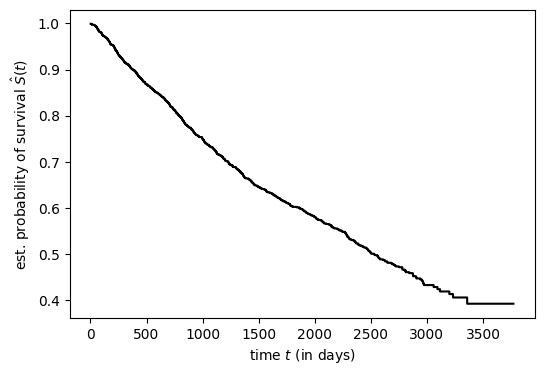

In [8]:
# (de Kamps, 2023)
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

timedeath = chf['TimeDeath']
timedeath[chf['StatusDeath'] < 1.]

statusdeath = [x > 0. for x in chf['StatusDeath']]
time, survival_prob = kaplan_meier_estimator(statusdeath, timedeath)

plt.figure(figsize=(6, 4))
plt.step(time, survival_prob, where="post", color="black")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$ (in days)")
plt.show()

### `sksurv`

Let's bring the event data into the stuctured array that `sksurv` expects. `(de Kamps, 2023)`


In [9]:
# (de Kamps, 2023)
import numpy as np

# Random seed for the future
np.random.seed(seed)

dfy = np.array(list(zip(statusdeath, timedeath)), dtype=[('Status', '?'), ('Survival_in_days', '<f8')])
print(dfy)

[( True, 1961.) ( True, 2842.) ( True,  749.) ... (False,  652.)
 (False,  652.) (False,  760.)]


We can now fit a `CoxPHSurvivalAnalysis` model.


In [10]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

# We do not require the StatusDeath or TimeDeath columns for `sksurv` so let us create a new dataframe without them
dfx = chf.drop(['StatusDeath', 'TimeDeath'], axis=1, inplace=False)

estimator = CoxPHSurvivalAnalysis()
estimator.fit(dfx, dfy)
estimator.score(dfx, dfy)

0.679573425174674

We can also view the coefficients for each covariate.


In [11]:
print(estimator.coef_)

[-0.19889853  0.30170977  0.04359563  0.56861131]


We can use other models from `sksurv` too.


In [12]:
# (de Kamps, 2023)
from sksurv.linear_model import CoxnetSurvivalAnalysis

estimatorlasso = CoxnetSurvivalAnalysis(l1_ratio=0.99, fit_baseline_model=True)
estimatorlasso.fit(dfx, dfy)
estimatorlasso.score(dfx, dfy)

0.6795975657139967

In [13]:
# (de Kamps, 2023)
from sksurv.svm import FastSurvivalSVM

estimatorsvm = FastSurvivalSVM(max_iter=1000, optimizer="rbtree", tol=1e-5, random_state=seed)
estimatorsvm.fit(dfx, dfy)
estimatorsvm.score(dfx, dfy)

0.6798952990323093

### Preliminary Conclusion

`SVM`, `CPH` and `CPH` with `Lasso` all seem to give similar results. We still have to do _cross validation_. `(de Kamps, 2023)`


In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator, dfx, dfy, cv=10)
scoreslasso = cross_val_score(estimatorlasso, dfx, dfy, cv=10)
scoresvm = cross_val_score(estimatorsvm, dfx, dfy, cv=10)

# Compare results
print(f"Mean score CoxPH: {scores.mean():.3f} (std: {scores.std():.3f})")
print(f"Mean score Lasso: {scoreslasso.mean():.3f} (std: {scoreslasso.std():.3f})")
print(f"Mean score SVM: {scoresvm.mean():.3f} (std: {scoresvm.std():.3f})")

Mean score CoxPH: 0.678 (std: 0.037)
Mean score Lasso: 0.678 (std: 0.036)
Mean score SVM: 0.677 (std: 0.037)


Very similar results.


## Implementation of the partial likelihood as a loss function

This is dual purpose. We can do a standard CPH regresssion and see if we agree on the result, but as a loss function it is also the output layer of `CoxNNet`, so if it works, it shouldn't be hard to implement that network. `(de Kamps, 2023)`

The log partial likelihood is given by:

$$
\ln L_{\boldsymbol{\beta}} = \sum^N_{i=1} c_i( \theta_i - \ln \sum_{j \in R(t_j)} \exp \theta_j)
$$

When we allow for tied events, the procedure needs to be adapted. There are two main approaches, one by `Breslow` and one by `Efron`. Most survival analysis packages include at least these two methods. We will implement the `Breslow` one to ensure we understand the procedure, but will use `sksurv`'s implementation in the loss function.

If $s_j=\sum_{i  \in D_j} \boldsymbol{x}_i$ is the sum of covariates over the set $D_j$ of individuals who die at time $t_j$, then

$$
L_{\boldsymbol{\beta}} = \frac{\Pi^J_{j=1} \exp \boldsymbol{\beta} \boldsymbol{s}_j}{ \left\{ \sum_{k \in R_j} \exp \boldsymbol{\beta} \boldsymbol{x}_k   \right\}^{d_j}}
$$

If we look at the file `coxph.py` we see that `CoxPHOptimizer` implements this likelihood.

**Note**: We have adapted this function instead of duplicating it further down to take in a `model` if specified by `CoxNNet`.


In [15]:
import torch 

# Adapted from Pölsterl (2023); de Kamps (2023)

class CoxPHOptimizer:
    """Negative partial log-likelihood of Cox proportional hazards model."""

    def __init__(self, X, event, time, alpha, ties):
        """Initialize the model.

        Args:
            X (pandas.DataFrame): The dataset.
            event (array): List of events.
            time (array): List of times.
            alpha (array): List of L2 penalties for each coefficient.
            ties (string): Which method to use for ties. One of 'breslow' or 'efron'.

        Raises:
            ValueError: If ties is not one of 'breslow' or 'efron'.
        """
        # Sort descending
        o = np.argsort(-time, kind="mergesort")
        self.x = torch.tensor(X[o, :], dtype=torch.float)
        self.event = event[o]
        self.time = time[o]
        self.alpha = alpha
        # Method to handle ties
        if ties not in ("breslow", "efron"):
            raise ValueError("ties must be one of 'breslow', 'efron'")
        ties = "breslow"
        self._is_breslow = ties == "breslow"

    def nlog_likelihood(self, w=None, model=None):
        """Compute negative partial log-likelihood.

        Args:
            w (array, shape = (n_features,), optional): Estimate of coefficients. Defaults to None.
            model (torch.nn.Module, optional): The NN model. Defaults to None.

        Returns:
            float: Average negative partial log-likelihood (NPLL per event).
        """
        time = self.time
        n_samples = self.x.shape[0]
        breslow = self._is_breslow
        xw = []
                
        if model is not None:
            for i in range(n_samples):
                # Computes risk score for each sample using the NN model
                # and appends it to the list xw, containing the risk scores for all samples.
                xw.append(model.forward(self.x[i]))
                # self.update(model)
        else:
            # This is the critical line of code for our project. 
            # It is the matrix-vector product of the matrix of features x
            # and the vector of weights w.
            # This is what we will be replacing with our NNs.
            # As seen above, when the model is not None, we use the NN model.
            xw = self.x@w

        loss = 0
        risk_set = 0
        k = 0
        
        while k < n_samples:
            ti = time[k]
            numerator = 0
            n_events = 0
            risk_set2 = 0
            while k < n_samples and ti == time[k]:
                if self.event[k]:
                    numerator = numerator + xw[k]
                    risk_set2 = risk_set2 + torch.exp(xw[k])
                    n_events = n_events + 1
                else:
                    risk_set = risk_set + torch.exp(xw[k])
                k = k + 1

            if n_events > 0:
                if breslow:
                    risk_set = risk_set + risk_set2
                    loss = loss - (numerator - n_events * torch.log(risk_set)) / n_samples
                else:
                    numerator = numerator/n_events
                    for _ in range(n_events):
                        risk_set = risk_set + risk_set2 / n_events
                        loss = loss - (numerator - torch.log(risk_set)) / n_samples

        return loss
    
    # We adapted this entire function to use torch tensors instead of numpy arrays.
    def update(self, model, offset=0):
        """Compute and updates gradient and Hessian matrix.
        
        Args:
            model (torch.nn.Module): The NN model.
            offset (float, optional): The offset. Defaults to 0.
        """
        time = self.time
        x = self.x
        breslow = self._is_breslow
        n_samples, n_features = x.shape
        
        # Compute risk score for each sample using the NN model
        # Everything else in this function is the same as the original code
        exp_xw = []
        for i in range(n_samples):
            exp_xw.append(torch.exp(offset + model.forward(torch.tensor(x[i], dtype=torch.float32))).item())

        gradient = torch.zeros((1, n_features), dtype=torch.float64)
        hessian = torch.zeros((n_features, n_features), dtype=torch.float64)

        inv_n_samples = 1. / n_samples
        risk_set = 0
        risk_set_x = torch.zeros((1, n_features), dtype=torch.float64)
        risk_set_xx = torch.zeros((n_features, n_features), dtype=torch.float64)
        k = 0
        
        # Iterate time in descending order
        while k < n_samples:
            ti = time[k]
            n_events = 0
            numerator = 0
            risk_set2 = 0
            risk_set_x2 = torch.zeros_like(risk_set_x)
            risk_set_xx2 = torch.zeros_like(risk_set_xx)
            while k < n_samples and ti == time[k]:
                # Preserve 2D shape of row vector
                xk = x[k:k + 1]

                # Outer product
                xx = torch.matmul(xk.T, xk)

                if self.event[k]:
                    numerator += xk
                    risk_set2 += exp_xw[k]
                    risk_set_x2 += exp_xw[k] * xk
                    risk_set_xx2 += exp_xw[k] * xx
                    n_events += 1
                else:
                    risk_set += exp_xw[k]
                    risk_set_x += exp_xw[k] * xk
                    risk_set_xx += exp_xw[k] * xx
                k += 1

            if n_events > 0:
                if breslow:
                    risk_set += risk_set2
                    risk_set_x += risk_set_x2
                    risk_set_xx += risk_set_xx2

                    z = risk_set_x / risk_set
                    gradient -= (numerator - n_events * z) * inv_n_samples

                    a = risk_set_xx / risk_set
                    # outer product
                    b = torch.matmul(z.T, z)

                    hessian += n_events * (a - b) * inv_n_samples
                else:
                    numerator /= n_events
                    for _ in range(n_events):
                        risk_set += risk_set2 / n_events
                        risk_set_x += risk_set_x2 / n_events
                        risk_set_xx += risk_set_xx2 / n_events

                        z = risk_set_x / risk_set
                        gradient -= (numerator - z) * inv_n_samples

                        a = risk_set_xx / risk_set
                        # outer product
                        b = torch.matmul(z.T, z)

                        hessian += (a - b) * inv_n_samples

        self.gradient = gradient.ravel()
        self.hessian = hessian
    
    def zero(self):
        """Reset gradient and Hessian matrix."""
        self.gradient = 0
        self.hessian = 0

### Verification

An independent check on the numbers would be handy. [John Fox introductory course on survival analysis](https://socialsciences.mcmaster.ca/jfox/Courses/soc761/survival-analysis.pdf) provides a numerical example. The advantage of that example is that we get to see which coefficient belongs to what covariate. `(de Kamps, 2023)`


In [16]:
%pip install lifelines

# (de Kamps, 2023)
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi = load_rossi()

rossi_cph = CoxPHFitter().fit(rossi, 'week', 'arrest')

rossi_cph.print_summary(columns=["coef", "se(coef)", "p"])

Note: you may need to restart the kernel to use updated packages.


<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-04-28 00:41:47 UTC

---
            coef   se(coef)      p
covariate                         
fin        -0.38       0.19   0.05
age        -0.06       0.02   0.01
race        0.31       0.31   0.31
wexp       -0.15       0.21   0.48
mar        -0.43       0.38   0.26
paro       -0.08       0.20   0.66
prio        0.09       0.03 <0.005
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

OK, that was a bit quick. What happened here? `lifelines` is another survival package. It was just one line to do CPH fit and the coefficients are almost identical to the example given by Fox (slide `76`). `(de Kamps, 2023)`

At the very least, we should redo the analysis with `sksurv`. `rossi` is a dataframe that is understood by `Pandas`.


In [17]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [18]:
# (de Kamps, 2023)
rossi_events = [True if x > 0. else False for x in rossi['arrest']]
rossi_times = [x for x in rossi['week']]

rdy = np.array(list(zip(rossi_events, rossi_times)), dtype=[('Status', '?'), ('Survival_in_weeks', '<f8')])
rdx = rossi[['fin','age','race','wexp','mar','paro','prio']]
rdx.head()

,fin,age,race,wexp,mar,paro,prio
0,0,27,1,0,0,1,3
1,0,18,1,0,0,1,8
2,0,19,0,1,0,1,13
3,1,23,1,1,1,1,1
4,0,19,0,1,0,1,3


In [19]:
# (de Kamps, 2023)
estimator_rossi = CoxPHSurvivalAnalysis()
estimator_rossi.fit(rdx, rdy)
estimator_rossi_score = estimator_rossi.score(rdx, rdy)
print('Estimator score is:', estimator_rossi_score)
print('Coefficients:', estimator_rossi.coef_)

Estimator score is: 0.6404231835047672
Coefficients: [-0.37902189 -0.05724593  0.31412977 -0.1511146  -0.43278257 -0.08498284
  0.09111154]


Again, very similar results to Fox's table and importantly, the order of the coefficients is given by the order of the covariates. `(de Kamps, 2023)`

Now let's go back for to the CHF data for a bit and see whether the lifelines analysis produces the same coefficients.


In [20]:
# (de Kamps, 2023)
cph_chf = CoxPHFitter().fit(chf, 'TimeDeath', 'StatusDeath')
cph_chf.print_summary(columns=["coef", "se(coef)", "p"])

# Store the coefficients
cph_chf_coef = cph_chf.summary['coef']

<lifelines.CoxPHFitter: fitted with 1802 total observations, 1065 right-censored observations>
             duration col = 'TimeDeath'
                event col = 'StatusDeath'
      baseline estimation = breslow
   number of observations = 1802
number of events observed = 737
   partial log-likelihood = -4949.39
         time fit was run = 2023-04-28 00:41:48 UTC

---
               coef   se(coef)      p
covariate                            
Haemoglobin   -0.20       0.02 <0.005
Diabetes       0.30       0.08 <0.005
ClinicAge      0.04       0.00 <0.005
MaleSex=Male   0.57       0.09 <0.005
---
Concordance = 0.68
Partial AIC = 9906.77
log-likelihood ratio test = 329.17 on 4 df
-log2(p) of ll-ratio test = 230.07

They are almost the same coefficients, and in the same order. `(de Kamps, 2023)`


In [21]:
# Do the same for the CoxPHSurvivalAnalysis on CHF
estimator_chf = CoxPHSurvivalAnalysis()
estimator_chf.fit(dfx, dfy)
estimator_chf_score = estimator_chf.score(dfx, dfy)
print('Estimator score is:', estimator_chf_score)
print('Coefficients:', estimator_chf.coef_)

Estimator score is: 0.679573425174674
Coefficients: [-0.19889853  0.30170977  0.04359563  0.56861131]


## Neural Network Implementation of Partial Regression


OK, we have a free floating loss function, as yet not really tested. It's not even a loss function as such, more a methodology. Let's tidy up. `(de Kamps, 2023)`


In [22]:
# Adapted from de Kamps (2023); Ching et al. (2018)
# We allow pasing in a model when computing the log-likelihood

torch.autograd.set_detect_anomaly = True

class CoxNNet(torch.nn.Module):
    """CoxNNet model for survival analysis."""

    def __init__(self, df, event, time, coefficients=None):
        """Initialize the CoxNNet model.

        Args:
            df (pandas.DataFrame): Dataframe containing the covariates and the event and time columns.
            event (str): Name of the event column. 
            time (str): Name of the time column.
            coefficients (torch.Tensor, optional): Initial coefficients. Defaults to None.
        """

        super().__init__()

        self.covariates = [x for x in df.columns if x != event and x != time]
        self.df = df
        self.dfx = df[self.covariates].to_numpy(dtype=float)
        self.events = df[event].to_numpy(dtype=float)
        self.times = df[time].to_numpy(dtype=float)
        
        n_covariates = len(self.covariates)
        
        # If no coefficients are passed in, we initialize them randomly
        if coefficients == None:
            # Set random seed for reproducibility
            torch.manual_seed(42)
            self.coefficients = torch.randn(n_covariates, requires_grad=True, dtype=torch.float)
        # Otherwise we use the coefficients passed in
        else:
            self.coefficients = coefficients.clone().detach().requires_grad_(True)
        # print(self.coefficients)
        
        # This line is used in coxpy to initialize the alphas
        alphas = torch.zeros(self.dfx.shape[1])
        
        self.opt = CoxPHOptimizer(self.dfx, self.events, self.times, alphas, 'breslow')

    def forward(self, model=None):
        """Calculate the log-likelihood over the entire dataset.
        This is the function that is called when we call net.forward().
        Important: this is where we can pass in a NN model.

        Args:
            model (torch.nn.Module, optional): NN model to use. Defaults to None.

        Returns:
            float: Log-likelihood over the entire dataset.
        """
        # sksurv calculates the llh /event and puts a minus sign in front, we undo that
        total = -self.df.shape[0]*self.opt.nlog_likelihood(self.coefficients, model)
        return total

# Simply testing to make sure the code works
c = torch.tensor([-0.38, -0.06, 0.31, -0.15, -0.43, -0.08, 0.09])
net = CoxNNet(rossi, 'arrest', 'week', coefficients=c)
loss = net.forward()
print("Loss:", loss.item())

Loss: -659.1309814453125


This is nearly identical to `lifelines` estimate. `(de Kamps, 2023)`

We can do the same for the `CHF` data.


In [23]:
chf_c = torch.tensor([0.04, -0.20, 0.30, 0.57], requires_grad=True)
chf_net_c = CoxNNet(chf, 'StatusDeath', 'TimeDeath', coefficients=chf_c)
chf_net_c.forward().item()

-6390.646484375

### Gradient Descent

We will use the `autograd` functionality provided by `PyTorch` to do the differentiation to maximise the partial log-likelihood.


In [24]:
# Adapted from de Kamps (2023)
def gradient_descent(df, event, time, lr, n_epoch, coefficients=None):
    """Performs gradient descent on the Cox model.

    Args:
        df (pandas.DataFrame): Dataframe containing the covariates and the event and time columns.
        event (str): Name of the event column.
        time (str): Name of the time column.
        lr (float): Learning rate.
        n_epoch (int): Number of epochs (iterations to run).
        coefficients (torch.Tensor, optional): Initial coefficients. Defaults to None.

    Returns:
        torch.nn.Module: The trained CoxNNet model (with updated coefficients).
    """
    
    net = CoxNNet(df, event, time, coefficients)
    loss = net.forward()
    print("Initial Loss:", loss.item())
    
    # Iterate n_epoch times
    for _ in range(n_epoch):
        # Updates the coefficients using autograd
        loss = net.forward()
        loss.backward()
        with torch.no_grad():
            # Use the specified learning rate
            net.coefficients += net.coefficients.grad * lr
            net.coefficients.grad.zero_()
    loss = net.forward()
    
    # Print the final loss and the updated coefficients
    print("Final Loss:", loss.item())
    print("Coefficients:", net.coefficients.detach().numpy())
    return net

rossi_net = gradient_descent(rossi, 'arrest', 'week', 0.0001, 4000)

Initial Loss: -3214.133056640625
Final Loss: -659.133544921875
Coefficients: [-0.37966567 -0.05688224  0.30440453 -0.14313512 -0.49413386 -0.08258463
  0.0913778 ]


Since the values found by `CoxNNet` for the coefficients appear close to the `lifelines` results, it appears we have successfully used `PyTorch` to calculate a gradient for the loss function and perform _steepest gradient descent_. Let's test on the `CHF` dataset.


In [25]:
# Note: this takes a while to run
# We tried to use the same learning rate (i.e. 0.0001) but that did not work
# Thus, we used a smaller learning rate (i.e. 0.000001)
chf_net = gradient_descent(chf, 'StatusDeath', 'TimeDeath', 0.000001, 4000)

Initial Loss: -5929.1572265625
Final Loss: -4952.9443359375
Coefficients: [-0.19312659  0.2342771   0.04278559  0.35431945]


Again, same results. We should probably also create a gradient descent method for training NN models.


In [26]:
# Train the NN using gradient descent
def train_model(df, event, time, model, lr, n_epoch, output=False):
    """Trains a NN model using gradient descent.

    Args:
        df (pandas.DataFrame): Dataframe containing the covariates and the event and time columns.
        event (str): Name of the event column.
        time (str): Name of the time column.
        model (_type_): NN model.
        lr (float): Learning rate.
        n_epoch (int): Number of epochs (iterations to run).
        output (bool, optional): Whether to print the loss before and after training. Defaults to True.
        
    Returns:
        float: The final loss.
    """
    net = CoxNNet(df, event, time)
    losses = []
    
    # Print the initial loss before training
    if output:
        print("Initial Loss:", net.forward(model).item())
    
    # Train the model
    for _ in range(n_epoch):
        # Compute the loss using the CoxNNet class and the NN model
        loss = net.forward(model)
        loss.backward()        
        losses.append(loss)
        
        # Update the weights using gradient descent
        with torch.no_grad():
            for param in model.parameters():
                param += param.grad * lr
            model.zero_grad()
    
    # Print the final loss
    if output:
        print("Final Loss:", net.forward(model).item())
        
        # Produce a plot of the loss over the epochs
        losses = [x.detach().numpy() for x in losses]
        plt.figure(figsize=(6, 4))
        plt.plot(range(1, n_epoch+1), losses, color='black')
        plt.xlabel('Epochs')
        plt.ylabel('Negative Partial Log-Likelihood Loss')
        plt.show()
    
    # Return the final PLE loss of the final trained model
    return losses[-1]

We can test this later. For now, let's use a way to measure the performance of the model.


## Concordance Statistics

The _concordance statistic_ (also known as the c-statistic) is a measure of the goodness of fit of a survival model. It quantifies the model's ability to correctly order the predicted survival times of pairs of individuals. A higher c-statistic indicates a better model fit. Here's how to compute the c-statistic given a set of survival times and a set of predicted survival times:


In [27]:
def concordance_statistic(risks, events, times, output=True):
    """Calculates the c-statistic for a given set of predicted risks and actual events and times.

    Args:
        risks (array): List of predicted risks.
        events (array): List of event indicators.
        times (array): List of survival times.

    Returns:
        float: c-statistic.
    """
    valid_pairs = 0
    concordant_pairs = 0
    discordant_pairs = 0
    tied_pairs = 0
    
    # Convert risks tensor to NumPy array
    if isinstance(risks, torch.Tensor):
        risks = risks.detach().cpu().numpy()
    
    # Sort risks, events, and times based on the times
    sorted_indices = np.argsort(times)
    risks = np.array(risks)[sorted_indices]
    events = np.array(events)[sorted_indices]
    times = np.array(times)[sorted_indices]

    n_samples = len(risks)
    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            if times[i] != times[j]:
                if events[i] and (times[i] < times[j]):
                    valid_pairs += 1
                    if risks[i] > risks[j]:
                        concordant_pairs += 1
                    elif risks[i] < risks[j]:
                        discordant_pairs += 1
                    else:
                        tied_pairs += 1

                elif events[j] and (times[j] < times[i]):
                    valid_pairs += 1
                    if risks[j] > risks[i]:
                        concordant_pairs += 1
                    elif risks[j] < risks[i]:
                        discordant_pairs += 1
                    else:
                        tied_pairs += 1
    
    # We can optionally produce a plot of the risk scores over time
    # This is useful for visualising the risk scores
    # Ideally, we would like to see the risk scores of the events (i.e. 1) higher than the non-events (i.e. 0)
    # This is because the risk scores are the log-hazard ratios
    if output:
        # Plots the risk scores over time
        plt.figure(figsize=(6, 4))
        colors = np.where(events, 'orange', 'blue')

        for color, label in zip(['orange', 'blue'], ['Event', 'Non-Event']):
            mask = (colors == color)
            plt.scatter(times[mask], np.array(risks)[mask], alpha=0.3, color=color, label=label)

        plt.xlabel('Time')
        plt.ylabel('Risk')
        plt.legend()
        plt.show()
    
    # Note we do not actually need to use discordant_pairs in the calculation
    # Since we already increment valid_pairs when we encounter a discordant pair
    return (concordant_pairs + 0.5 * tied_pairs) / valid_pairs

The function `concordance_statistic` calculates the c-statistic given the predicted risks, event indicators, and survival times. It iterates through all valid pairs of individuals and counts the number of concordant, discordant, and tied pairs. The c-statistic is then calculated as the ratio of the sum of concordant pairs and half the tied pairs to the total number of valid pairs.

After defining the function, the predicted risks for each individual in the dataset are calculated by multiplying the covariate matrix `net.dfx` with the optimized model coefficients. The c-statistic is then computed using the `concordance_statistic` function, and the result is printed.

We can define another function `get_concordance` which takes in a `CoxNNet` model, a dataframe, an event and a time, and returns the c-statistic.


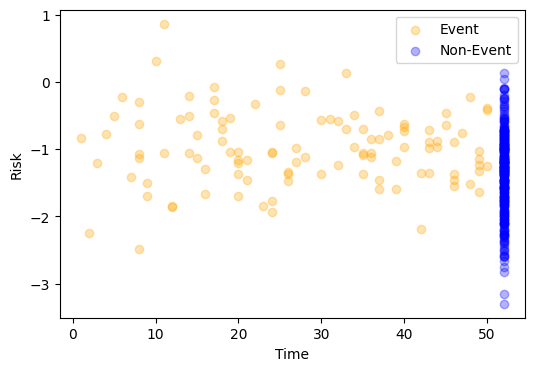

Base Rossi Score: 0.643355119825708


In [28]:
def get_concordance_statistic(df, event, time, net, output=True):
    """Calculates the c-statistic for a given dataset for the CoxNNet model.

    Args:
        df (pandas.DataFrame): Dataframe containing the covariates and the event and time columns.
        event (str): Name of the event column.
        time (str): Name of the time column.
        net (torch.nn.Module): CoxNNet model.

    Returns:
        float: c-statistic.
    """
    # Calculate the predicted risk for each individual in the dataset
    risks = np.matmul(net.dfx, net.coefficients.detach().numpy())
    
    return concordance_statistic(risks, df[event].to_numpy(), df[time].to_numpy(), output)

print("Base Rossi Score:", get_concordance_statistic(rossi, 'arrest', 'week', rossi_net))

This is the same c-statistic as the one used by `lifelines` for the `Rossi` dataset. We can see that these coefficients may be the best, but they do not have high predictive acuity. Ideally, we see clusters of points for each class - each class should be well separated. Since this would be difficult to do in practice, our aim is that those who survived less have a higher risk than those who survived longer. This is not the case here, as we can see the risk values completely ranged at all values of times.


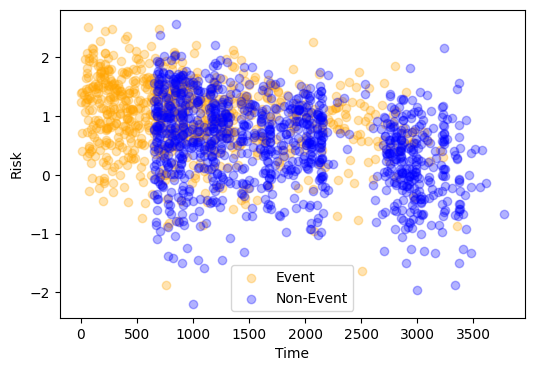

Base CHF Score: 0.6786927277953435


In [29]:
print("Base CHF Score:", get_concordance_statistic(chf, 'StatusDeath', 'TimeDeath', chf_net))

### Concordance Statistic for Neural Network Models

Now, let us adapt the `get_concordance_statistic` to allow for a NN model. We need to compute the risk for an invidual using the NN model, instead of computing the dot product using the coefficients.


In [30]:
# Calculate the predicted risk for each individual in the dataset
def get_concordance_statistic_nn(df, event, time, model, output=True):
    """Calculates the c-statistic for a given dataset using a NN model to compute predicted risks.

    Args:
        df (pandas.DataFrame): Dataframe containing the covariates and the event and time columns.
        event (str): Name of the event column.
        time (str): Name of the time column.
        model (torch.nn.Module): NN model.
        output (bool, optional): Whether to print the loss before and after training. Defaults to True.

    Returns:
        float: c-statistic.
    """
    # Calculate the predicted risk for each individual in the dataset using the NN
    x = torch.tensor(df[[col for col in df.columns if col not in [event, time]]].values, dtype=torch.float)    
    with torch.no_grad():
        predicted_risk = np.array([model.forward(xi).item() for xi in x])
    
    # Compute the c-statistic
    return concordance_statistic(predicted_risk, df[event].to_numpy(), df[time].to_numpy(), output)

Let us test this on a simple NN which is essentially the same as the CPH model.


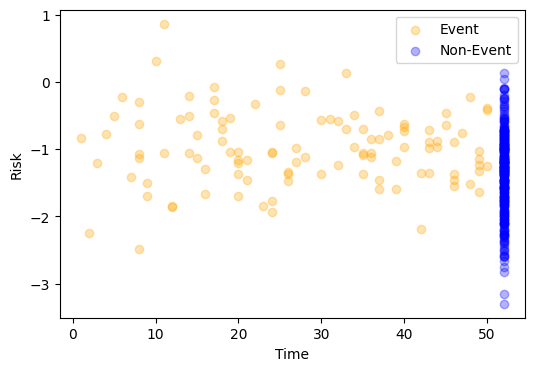

FWL Rossi Score: 0.643355119825708


In [31]:
# This NN essentially computes the same as the CoxPH model
# i.e. xw = self.x@w = x1w1 + x2w2 + x3w3 + x4w4 + ... + xnw_n
# This is computed in the forward pass
# We call it linear because it is a linear model, i.e. it is a linear combination of the covariates
# and does not have any hidden layers, thus not capturing any non-linear relationships.
class FixedWeightLinear(torch.nn.Module):
    """Simple NN with no hidden layers that simply computes the dot product of the input and the weights.
    This is essentially the same as the CoxPH model.
    We do not train this model, we simply use it to compute the predicted risk for each individual in the dataset.
    """
    
    def __init__(self, weights):
        """Initializes the FWL model.

        Args:
            weights (torch.Tensor): Weights to use for the dot product.
        """
        super(FixedWeightLinear, self).__init__()
        # Initialize the weights as a torch.nn.Parameter
        self.weights = torch.nn.Parameter(weights.clone().detach().requires_grad_(True))

    def forward(self, x):
        """Simply multiply the weights by the input.

        Args:
            x (array): List of covariates for a single individual.

        Returns:
            float: Predicted risk.
        """
        return torch.matmul(x, self.weights)
    
# Initialize the FWL model with the learned coefficients
rossi_fwl = FixedWeightLinear(rossi_net.coefficients)

# Compute the c-statistic using the FWL model
print("FWL Rossi Score:", get_concordance_statistic_nn(rossi, 'arrest', 'week', rossi_fwl))

We achieeve the same c-statistic. As we have seen we have been able to reproduce coefficients and the c-statistic scores, we have everything needed to begin building NNs.

## Neural Network Exploration

First, we will begin by adapting the `FixedWeightLinear` model so that we may use random weights. We will need to be able to train the model with random weights, and then use the optimizer to find the best weights.


In [32]:
# This class lets us use random weights for each feature
class VariableWeightLinear(FixedWeightLinear):
    """Simple NN with no hidden layers that simply computes the dot product of the input and the weights.
    However, the weights are randomly initialized and then trained using gradient descent."""
    
    def __init__(self, n):
        """Initializes the VWL model.

        Args:
            n (int): Number of features in the dataset.
        """
        # Randomise weights
        torch.manual_seed(42)
        weights = torch.nn.Parameter(torch.randn(n, requires_grad=True, dtype=torch.float))
        super(VariableWeightLinear, self).__init__(weights)
        # Print these initial weights
        print("Initial VWL", self.weights)

    def forward(self, x):
        """Simply multiply the weights by the input.

        Args:
            x (array): List of covariates for a single individual.

        Returns:
            float: Predicted risk.
        """
        # Again, simply multiply the weights by the input
        return torch.matmul(x, self.weights)
    
# Initialize the VariableWeightLinear model
n_covariates = len([x for x in rossi.columns if x != 'arrest' and x != 'week'])
rossi_vwl = VariableWeightLinear(n_covariates)

# Compute the c-statistic using the trained VWL model
print("Initial VWL Rossi Score:", get_concordance_statistic_nn(rossi, 'arrest', 'week', rossi_vwl, False))

Initial VWL Parameter containing:
tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229, -0.1863,  2.2082],
       requires_grad=True)
Initial VWL Rossi Score: 0.580561607358993


Let us now train this model. The goal is to produce the same weights as the CPH model.


In [33]:
# Train the model using the train_model function we created before
rossi_vwl_loss = train_model(rossi, 'arrest', 'week', rossi_vwl, 0.0001, 4000, False)

# Compute the c-statistic using the trained VWL model
rossi_vwl_c = get_concordance_statistic_nn(rossi, 'arrest', 'week', rossi_vwl, False)

# Print the trained weights and loss in format string
print("Trained VWL Rossi Weights: {0} \
      \nTrained VWL Rossi Loss: {1} \
      \nTrained VWL Rossi Score {2}"
      .format(rossi_vwl.weights, rossi_vwl_loss, rossi_vwl_c))

Trained VWL Rossi Weights: Parameter containing:
tensor([-0.3797, -0.0569,  0.3044, -0.1431, -0.4941, -0.0826,  0.0914],
       requires_grad=True)       
Trained VWL Rossi Loss: -659.1336669921875       
Trained VWL Rossi Score 0.643355119825708


We can see that the weights are very close to the CPH model. Now we can begin experimenting with different NN architectures.

### Single Hidden Layer

This simple NN class allows us to experiment with the number of neurons in a single hidden layer.


In [34]:
def plot_weights(weights):
    """Plots the distribution of the weights.

    Args:
        weights (torch.Tensor): Weights to plot.
    """
    
    plt.figure(figsize=(6, 4))
    plt.hist(weights, bins=int(np.sqrt(len(weights))), color='black')
    plt.xlabel('Weights')
    plt.ylabel('Frequency')
    plt.show()

class SNN(torch.nn.Module):
    """Simple NN with one hidden layer."""
    
    def __init__(self, input_size, hidden_size=None):
        """Initializes the SNN model.

        Args:
            input_size (int): Number of covariates.
            hidden_size (int): Number of neurons in the hidden layer.
        """
        
        # Randomise weights
        torch.manual_seed(42)
        
        super(SNN, self).__init__()
        # Store the input and hidden sizes
        self.input_size = input_size
        # If no hidden size is specified, use the sqrt(input_size + 1) rounded up
        if hidden_size is None:
            self.hidden_size = np.sqrt(input_size + 1).astype(int) + 1
        else:
            self.hidden_size = hidden_size
        
        # Create the layers
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_size, 1)
        
        # Create the model
        self.model = torch.nn.Sequential(self.fc1, self.relu, self.fc2)

    def forward(self, x):
        """Predicts the risk for a single individual.

        Args:
            x (array): List of covariates for a single individual.

        Returns:
            float: Predicted risk.
        """
        return self.model(x)
    
    def return_weights(self):
        """Plots the weights in a histogram."""
        
        plot_weights(torch.cat([self.fc1.weight.view(-1), self.fc1.bias, self.fc2.weight.view(-1), self.fc2.bias]).detach().numpy())

Now let's create a class which we can use in the future to help test this model, and other models in the future.


Initial Loss: -684.2033081054688
Final Loss: -661.70849609375


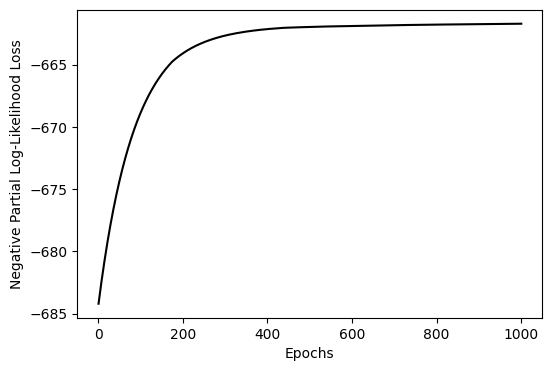

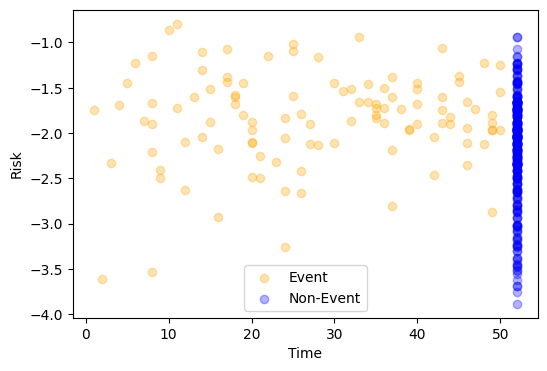

SNN[7, 3, 1] 
- Loss: [-661.70874]
- Score: 0.6461389494069233


(array([-661.70874], dtype=float32), 0.6461389494069233)

In [35]:
# This allows us to test different architectures of the `NN` model
def test_nn(df, event, time, model, lr, n_epoch, output=False):
    """Trains the model and prints the c-statistic.

    Args:
        df (pandas.DataFrame): Dataset to use.
        event (str): Name of the event column.
        time (str): Name of the time column.
        model (torch.nn.Module): NN model.
        lr (float): Learning rate.
        n_epoch (int): Number of epochs.
        output (bool, optional): Whether to print the output. Defaults to False.
    """
    
    loss = train_model(df, event, time, model, lr, n_epoch, output)
    score = get_concordance_statistic_nn(df, event, time, model, output)
    
    if output:
        # Print format string with loss and score
        param = ""
        if type(model).__name__ == "SNN":
            param = f"[{model.input_size}, {model.hidden_size}, 1]"
        elif type(model).__name__ == "GNN": # This will be useful later
            param = model.layer_sizes
        print(f"{type(model).__name__}{param} \n- Loss: {loss}\n- Score: {score}")
    return loss, score

# Test the simple model on the Rossi data set
input_size = rossi.shape[1] - 2  # Number of input features (excluding censor and time variables)
hidden_size = (np.sqrt(input_size + 1)).astype(int) + 1  # Number of hidden units
rossi_snn = SNN(input_size, hidden_size)
test_nn(rossi, 'arrest', 'week', rossi_snn, 0.00001, 1000, True)

This already performed better than the previous models. Let's investigate the effect of the number of neurons in the hidden layer.


In [36]:
# Create a loop to test different architectures (begin with 1 neuron in single hidden layer, increase in steps of 1 until 2 * input_size)
rossi_snn_losses = []
rossi_snn_scores = []

# This allows us to test different architectures of the NN model
# We do not want to add too many neurons because this can lead to overfitting
rossi_snn_hidden_sizes = [1 + i for i in range(input_size * 2)]

# This stores the best model and its score
rossi_snn_best = [None, 0, 0]

# Loop through the different architectures
for i in rossi_snn_hidden_sizes:
    model = SNN(input_size, i)
    loss, score = test_nn(rossi, 'arrest', 'week', model, 0.0001, 1000, False)
    loss = loss.detach().numpy()
    if score > rossi_snn_best[2]:
        rossi_snn_best = [model, loss, score]
    rossi_snn_losses.append(loss)
    rossi_snn_scores.append(score)

# Print the scores of the best architecture
print("Best SNN Rossi: \
    \n- Architecture: SNN[{0}, {1}, 1] \
    \n- Loss: {2} \
    \n- Score: {3}"
    .format(input_size, rossi_snn_best[0].hidden_size, rossi_snn_best[1], rossi_snn_best[2]))

Best SNN Rossi:     
- Architecture: SNN[7, 13, 1]     
- Loss: [-659.78436]     
- Score: 0.6481723553618979


Even better performance. We could use more than `13` neurons in the hidden layer, however, we should not use more than double the number of input neurons in the hidden layer. Let us visualise the performance for the other models too.


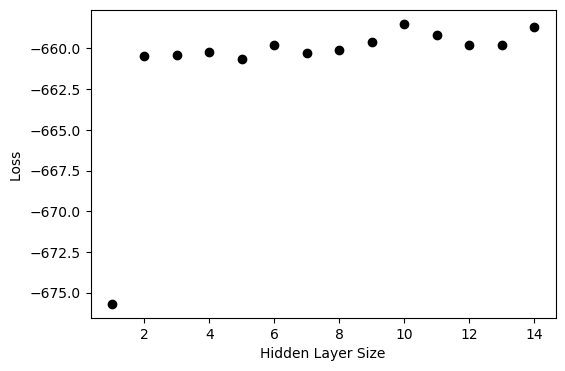

In [37]:
# Plot the losses
plt.figure(figsize=(6, 4))
plt.scatter(rossi_snn_hidden_sizes, rossi_snn_losses, label='Loss', color='black')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Loss ')
plt.show()

Note that the datapoint on the bottom left is the same as the regular model, simply multiplying the coefficients by the covariates.


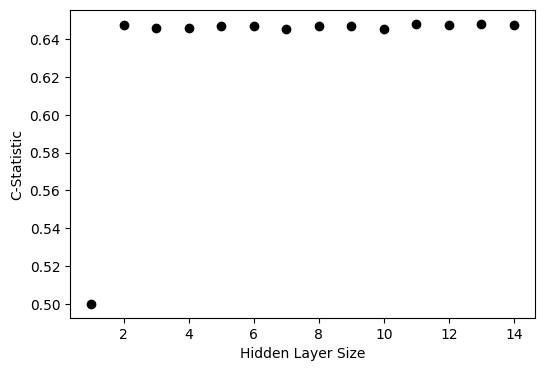

In [38]:
# Plot the c-Score scores
plt.figure(figsize=(6, 4))
plt.scatter(rossi_snn_hidden_sizes, rossi_snn_scores, label='C-Statistic', color='black')
plt.xlabel('Hidden Layer Size')
plt.ylabel('C-Statistic')
plt.show()

Ok. The graphs indicate that the size of the hidden layer does not really matter.

Let's also visualize the weights of the model to see if we have potential overfitting.


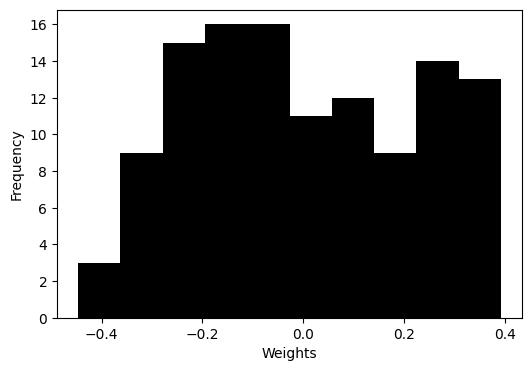

In [39]:
# Use a histogram with n_bins = size of data square root
rossi_snn_best[0].return_weights()

Interestingly, the weights are quite small. This is a good sign. Instead of using a single hidden layer, let's try using multiple.

### Multiple Hidden Layers

Let us create a more general NN class that allows us to experiment with the number of hidden layers and neurons in each layer.

The goal is to see how the number of parameters affects the performance of the NN.


In [40]:
class GNN(torch.nn.Module):
    """General NN with any number of hidden layers with any number of neurons."""
    
    def __init__(self, layer_sizes):
        """Initializes the GNN model.

        Args:
            layer_sizes (array): List of the number of neurons in each layer.
        """
        
        # Randomise weights
        torch.manual_seed(42)
        super(GNN, self).__init__()
        # We want to store the sizes in a list for the future
        self.layer_sizes = layer_sizes
        # Create a list of layers
        self.layers = torch.nn.ModuleList()        
        # Create the layers based on the input sizes
        for i in range(len(layer_sizes) - 1):
            # Add a linear layer
            self.layers.append(torch.nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            # Add a ReLU activation function after every linear layer except the last one
            if i < len(layer_sizes) - 2:  # Don't add ReLU activation after the last linear layer
                self.layers.append(torch.nn.ReLU())
        # Create the model
        self.model = torch.nn.Sequential(*self.layers)

    def forward(self, x):
        """Predicts the risk for a single individual.

        Args:
            x (array): List of covariates for a single individual.

        Returns:
            float: Predicted risk.
        """
        return self.model(x)

    def return_weights(self):
        """Plots the weights in a histogram."""
        
        weights = []
        for layer in self.layers:
            if type(layer).__name__ == "Linear":
                weights.append(layer.weight.view(-1))
                weights.append(layer.bias)
                
        plot_weights(torch.cat(weights).detach().numpy())

This class takes a list of integers as input, where each integer represents the number of neurons in that layer. The first integer is the input size, the last integer should be `1` (as the final output neuron should be `1`), and the integers in between represent the number of neurons in each hidden layer. We could adapt this class to allow us to further experiment with the properties of the NN.

We will stick to using simple architectures that are easy to understand. These should capture the relationships of the covariates and not be too complex to overfit the data.


Initial Loss: -681.0164184570312
Final Loss: -661.7910766601562


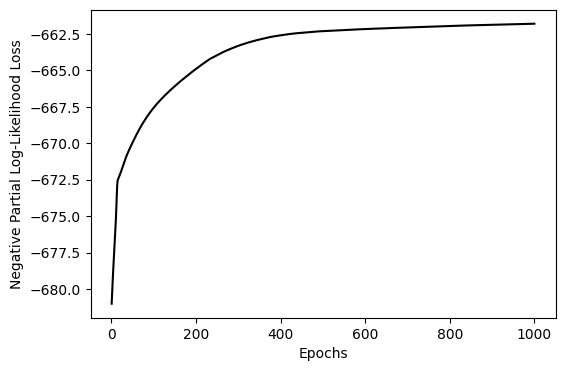

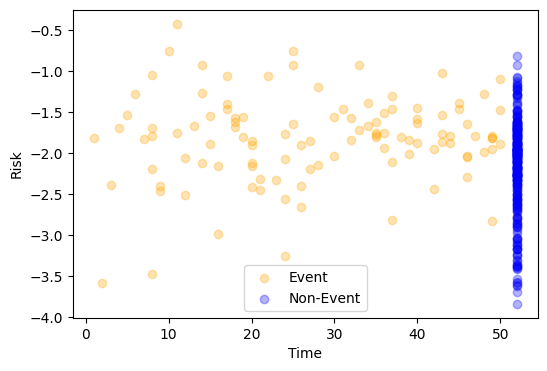

GNN[7, 8, 3, 1] 
- Loss: [-661.79083]
- Score: 0.6453401113531833


(array([-661.79083], dtype=float32), 0.6453401113531833)

In [41]:
rossi_gnn = GNN([7, 8, 3, 1]) # 7 input neurons, 2 hidden layers with 8 and 3 neurons, 1 output neuron
test_nn(rossi, 'arrest', 'week', rossi_gnn, 0.0001, 1000, True)

Not as good as the `SNN`. Let us investigate further.


Initial Loss: -675.7830810546875
Final Loss: -675.6834106445312


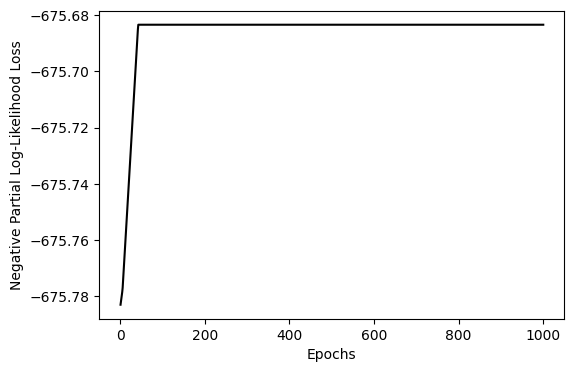

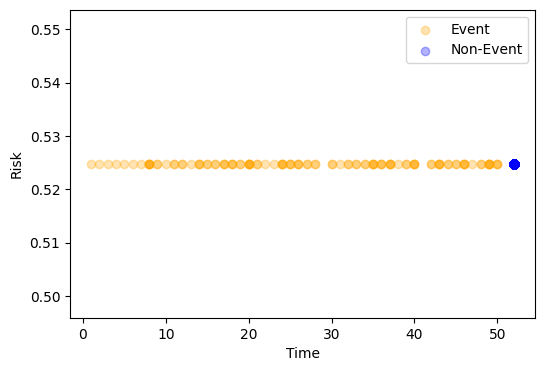

GNN[7, 14, 3, 1] 
- Loss: [-675.6834]
- Score: 0.5


(array([-675.6834], dtype=float32), 0.5)

In [42]:
rossi_gnn = GNN([7, 14, 3, 1]) # 7 input neurons, 2 hidden layers with 14 and 3 neurons, 1 output neuron
test_nn(rossi, 'arrest', 'week', rossi_gnn, 0.0001, 1000, True)

This one could not produce a solution. Let us try more neurons in the final hidden layer.


Initial Loss: -672.111083984375
Final Loss: -661.6001586914062


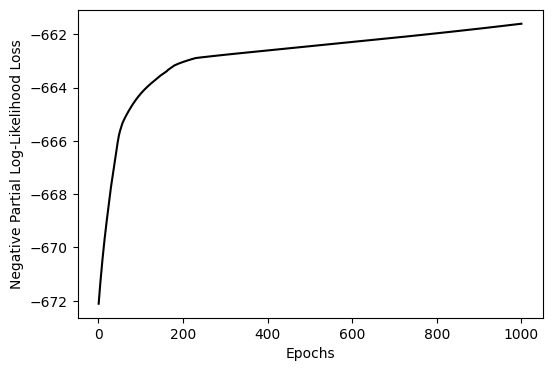

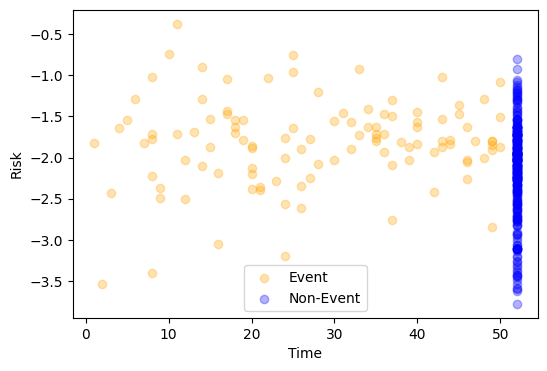

GNN[7, 14, 7, 1] 
- Loss: [-661.6022]
- Score: 0.6459694989106753


(array([-661.6022], dtype=float32), 0.6459694989106753)

In [43]:
rossi_architecture = [7, 14, 7, 1] # 7 input neurons, 2 hidden layers with 14 and 7 neurons, 1 output neuron
rossi_gnn = GNN(rossi_architecture)
test_nn(rossi, 'arrest', 'week', rossi_gnn, 0.0001, 1000, True)

Interestingly, we see that increasing the number of hidden layers and neurons does not neccessarily produce a better model. This may be due to overfitting, or maybe the neural network can no longer capture any more of the data. Let us again visualise the weights of the model.


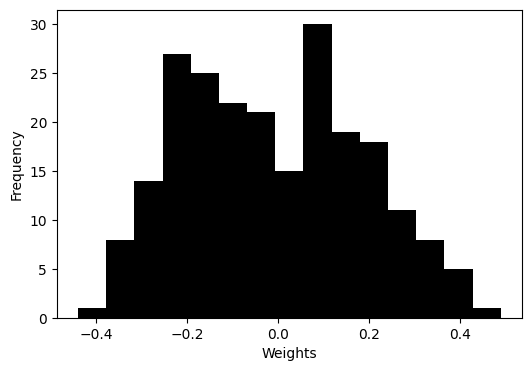

In [44]:
# Visualise weights of the GNN model using a histogram
# We expect there to be exponentially more weights in the GNN model than the SNN model
rossi_gnn.return_weights()

Again, this is good. The weights do not seem to cause overfitting.

We considered exploring other methods, including _regularisation_, the number of _epochs_, the _learning rate_, the _activation function_, the _optimizer_, _feature processing_, _ensemble methods_ and _early stopping_. However, we will leave this for another time. It is unlikely this will improve performance. It seems the models can only perform so well. Let's investigate the data further.


## Latent Class Analysis

_Latent Class Analysis_ (LCA) is a statistical method for identifying hidden subgroups within a population. In the context of our problem, we can use LCA to separate patients into different subgroups and then train separate `GNN` models for each subgroup.

To create a class for latent class analysis using the CPH model, we can:

1. Split the dataset into a given number of components (latent classes).
2. Train a separate `GNN` model for each component.
3. Produce the final loss and c-statistic over all components.

To split the data, we can use the `KMeans` clustering algorithm. This algorithm takes in a number of clusters and returns a list of cluster labels for each individual in the dataset. The `KMeans` algorithm is used as the default method in `GuassianMixture`.


In [45]:
%pip install sklearn

from sklearn.mixture import GaussianMixture

class LCA:
    """Latent Class Analysis model for survival analysis."""
    
    def __init__(self, df, event, time, n_components=2, architecture=None):
        """Initialises the LCA model.

        Args:
            df (pandas.DataFrame): Dataframe containing the data.
            event (str): Name of the event column.
            time (str): Name of the time column.
            n_components (int, optional): Number of components in the Gaussian Mixture Model. Defaults to 2.
            architecture (torch.Tensor, optional): Architecture of the GNN model. Defaults to None.
        """
        self.components = n_components
        self.df = df
        self.event = event
        self.time = time
        
        # Initialise the covariates and the sizes
        # We take away 1 as we do not want to include the class, event and time variables
        self.input_size = len(self.df.columns) - 3
        
        # If the architecture is not None, we use the architecture provided
        if architecture is None:
            self.architecture = [self.input_size, 
                                 self.input_size + 1, np.sqrt(self.input_size + 1).astype(int) + 1,
                                 1]
        else:
            self.architecture = architecture
        # Initialise the models
        # We use GNNs as the models because they are more flexible than SNNs
        gnn = GNN(self.architecture)
        self.models = [gnn for _ in range(n_components)]
        # Initialise the Gaussian Mixture Model
        # We set the random state for reproducibility
        self.gmm = GaussianMixture(n_components=n_components, random_state=seed)
        
        # Stores dataframe for each latent class
        self.classes = []
        
        # Store risks for each each patient
        self.risks = []

    def fit(self):
        """Fits the LCA model to the dataset. and creates the seprate latent classes."""
        
        # Fit Gaussian Mixture Model to the dataset using Expectation Maximisation algorithm
        self.gmm.fit(self.df)
        
        # Assign patients to the latent classes
        self.df['LatentClass'] = self.gmm.predict(self.df)
    
    def train(self, lr=0.00001, epochs=1000, output=False):
        """Trains the GNN models for each latent class.
        
        Args:
            lr (float, optional): Learning rate. Defaults to 0.00001.
            epochs (int, optional): Number of epochs. Defaults to 1000.
            output (bool, optional): Whether to print the loss and output loss graph. Defaults to False.
        
        Returns:
            float: Total loss of the model.
        """  

        # Append the dataframes for each latent class to the classes list
        for i in range(self.components):
            self.classes.append(self.df.loc[self.df['LatentClass'] == i].drop('LatentClass', axis=1))
            # Remove the latent class column from the dataframe
            self.classes[i] = self.df.drop('LatentClass', axis=1)        
            
        # Initialise the total loss
        total_loss = 0
        
        # For each model, train the model on the data for the given latent class
        for i, model in enumerate(self.models):
            # Train the model of the latent class
            loss = train_model(self.classes[i], self.event, self.time, model, lr, epochs, output)
            print("Loss for latent class " + str(i) + ": " + str(loss.detach().numpy()))
            # Add the loss to the total loss (remember the loss is negative)
            total_loss += -loss
        
        return total_loss.detach().numpy()
    
    def predict(self):
        """Produces the predictions for each patient in the dataset and computes the final loss and Score."""

        classes = []
        # Iterate over all patients and compute the risk for each patient using the appropriate model
        for _, x in self.df.iterrows():
            latent_class = x['LatentClass']
            # Get the model for the patient
            model = self.models[int(latent_class)]
            # Remove LatentClass, time and event column from the patient data
            x = x.drop('LatentClass').drop(self.event).drop(self.time)
            # Make patient a tensor
            x = torch.tensor(x.to_numpy(), dtype=torch.float32)
            # Compute the risk for the patient
            with torch.no_grad():
                risk = model.forward(x)
            # Append the risk to the list of risks
            self.risks.append(risk)
            
        # Use the predicted risks to compute the score  
        return concordance_statistic(self.risks, self.df[self.event].to_numpy(), self.df[self.time].to_numpy(), True)

  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [19 lines of output]
      Traceback (most recent call last):
        File "c:\Users\omarc\OneDrive - University of Leeds\Year 3\3931 Individual Project\Code\.venv\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\omarc\OneDrive - University of Leeds\Year 3\3931 Individual Project\Code\.venv\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
        File "c:\Users\omarc\OneDrive - University of Leeds\Year 3\3931 Individual Project\Code\.venv\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
        File "C:\Users\omarc\AppData\Local\Temp\pip-build-env-_99wh83v\over

This implementation uses _Gaussian Mixture Models_ (GMM) to split the dataset into the specified number of components. We can use this class by initializing it with the desired number of components, then fit it with our data, which trains models for each latent class. We can then predict the risk for new patients and produce the overall c-statistic.


In [46]:
def lca(df, event, time, n=2, architecture=None, lr=0.0001, epochs=1000, output=False):
    """Function to fit the LCA model and train the GNN models.

    Args:
        df (pandas.DataFrame): Dataframe containing the data
        event (str): Name of the event column
        time (str): Name of the time column
        n (int): Number of latent classes
        architecture (list, optional): Architecture of the GNN model. Defaults to None.
        lr (float, optional): Learning rate. Defaults to 0.0001.
        epochs (int, optional): Number of epochs. Defaults to 1000.
        output (bool, optional): Whether to print the loss and output loss graph. Defaults to False.

    Returns:
        LCA: Fitted LCA model.
    """
    X = df.copy()

    # Initialise LatentClass column as 0
    X['LatentClass'] = 0

    # Fits the LCA model
    model = LCA(X, event, time, n_components=n, architecture=architecture)
    model.fit()
    
    # Print the number of patients in each latent class
    print(model.df['LatentClass'].value_counts())
    
    # Trains the GNN models
    loss = model.train(lr, epochs, output)
    
    score = model.predict()
    
    print("Total Loss: {0} \nScore: {1}".format(loss, score))
    
    return model

Let's now test this class on the `Rossi` dataset.


0    432
Name: LatentClass, dtype: int64
Loss for latent class 0: [-661.79083]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


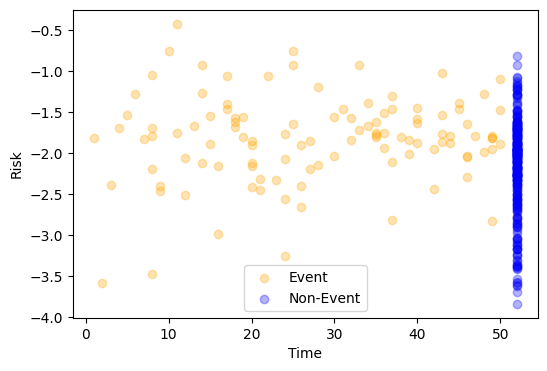

Total Loss: [661.79083] 
Score: 0.6453401113531833


In [47]:
rossi_lca1 = lca(rossi, 'arrest', 'week', 1)

As we have achieved the same results as before, we know we have implemented the class correctly.


0    318
1    114
Name: LatentClass, dtype: int64
Loss for latent class 0: [-661.79083]
Loss for latent class 1: [-660.9857]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


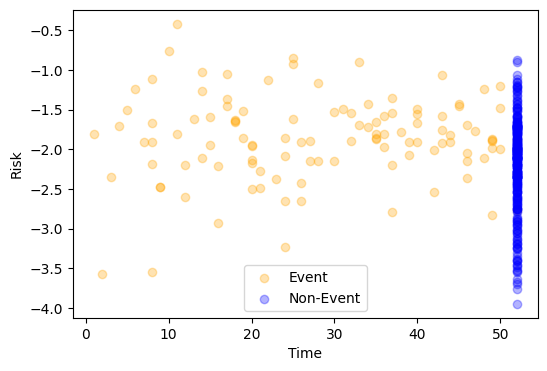

Total Loss: [1322.7766] 
Score: 0.6461389494069233


In [48]:
rossi_lca2 = lca(rossi, 'arrest', 'week', 2)

Slightly better. Let us investigate the architecture of the `GNN`'s too.


0    318
1    114
Name: LatentClass, dtype: int64
Loss for latent class 0: [-661.6022]
Loss for latent class 1: [-659.26654]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


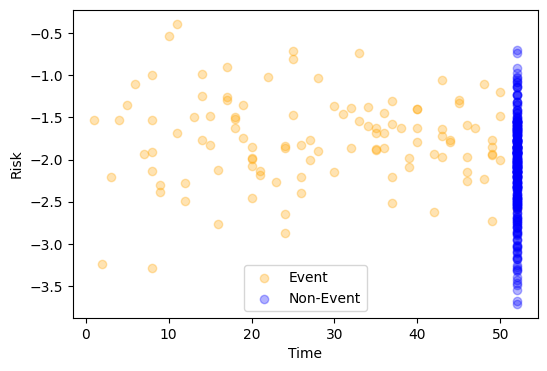

Total Loss: [1320.8687] 
Score: 0.6512950859356088


In [49]:
rossi_lca2_arch = lca(rossi, 'arrest', 'week', 2, rossi_architecture)

Best model so far. Now let us test this using `3` classes.


2    258
1    113
0     61
Name: LatentClass, dtype: int64
Loss for latent class 0: [-661.79083]
Loss for latent class 1: [-660.9857]
Loss for latent class 2: [-659.9398]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


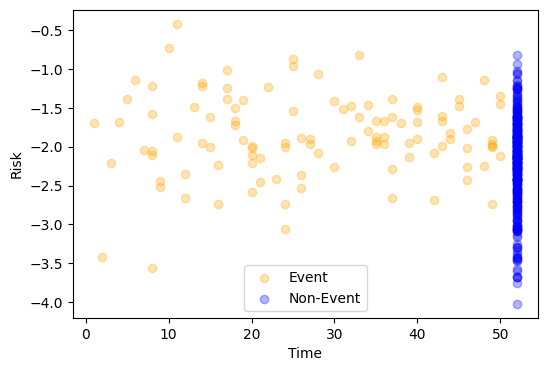

Total Loss: [1982.7164] 
Score: 0.6455579762769306


In [50]:
rossi_lca3 = lca(rossi, 'arrest', 'week', 3)

Does not perform as well as the `2` class model. Let us investigate the architecture of the `GNN`'s too.


2    258
1    113
0     61
Name: LatentClass, dtype: int64
Loss for latent class 0: [-661.6022]
Loss for latent class 1: [-659.26654]
Loss for latent class 2: [-657.6466]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


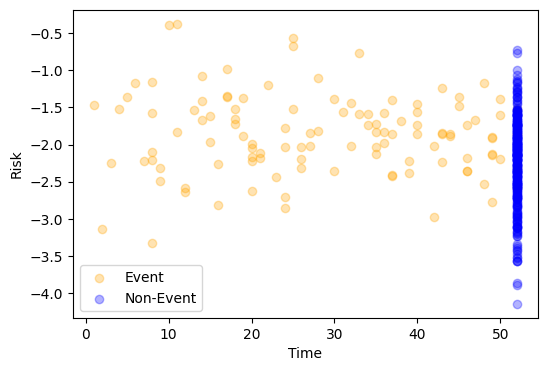

Total Loss: [1978.5153] 
Score: 0.6518034374243524


In [51]:
rossi_lca3_arch = lca(rossi, 'arrest', 'week', 3, rossi_architecture)

Now this is the best model so far. Let's finally try using `4` classes.


2    196
0    122
1     95
3     19
Name: LatentClass, dtype: int64
Loss for latent class 0: [-661.79083]
Loss for latent class 1: [-660.9857]
Loss for latent class 2: [-659.9398]
Loss for latent class 3: [-659.42377]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


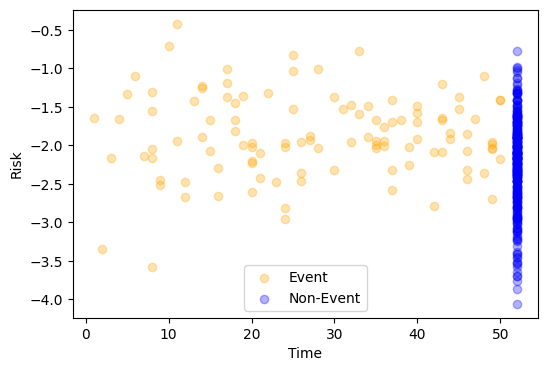

Total Loss: [2642.1401] 
Score: 0.6461631566206729


In [52]:
rossi_lca4 = lca(rossi, 'arrest', 'week', 4)

Performs better than the `2` and the `3` class models with the same archicture. Let's adapt the architecture here and see if it produces the best model.


2    196
0    122
1     95
3     19
Name: LatentClass, dtype: int64
Loss for latent class 0: [-661.6022]
Loss for latent class 1: [-659.26654]
Loss for latent class 2: [-657.6466]
Loss for latent class 3: [-655.7109]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


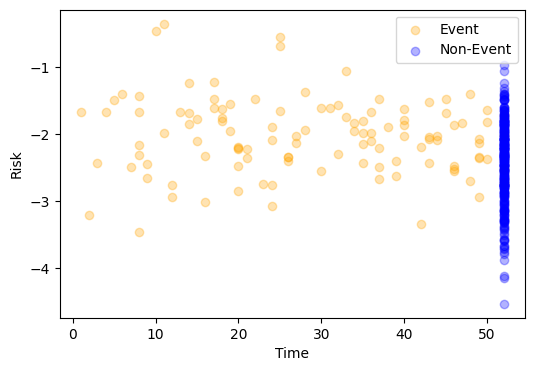

Total Loss: [2634.226] 
Score: 0.6573468893730332


In [53]:
rossi_lca4_arch = lca(rossi, 'arrest', 'week', 4, rossi_architecture)

Again, the best model so far. As expected by `Mbotwa et al. (2021)`, it was unlikely that NNs would have greatly increased predictive acuity. It seems that using `LCA` does lead to better results. We also see that the choice of architecture can affect the performance of the model a little. Let' try a completely different method.

## Convolutional Neural Network

_Convolutional Neural Networks_ (CNNs) are a type of neural network that are commonly used for image classification. They are able to capture the spatial relationships between pixels in an image. We can use CNNs to capture the spatial relationships between the covariates in our dataset. By transforming a set of patient data into an image, i.e. a grid of pixels where each pixel represents a covariate, we can then use a CNN to make predictions of a patient's risk.


In [54]:
# Create a simple CNN
class CNN(torch.nn.Module):
    """Simple CNN model for survival analysis."""
    def __init__(self, df, event, time, width=0, height=0):
        """Initialises the CNN model.
        
        Args:
            df (pandas.DataFrame): Dataframe containing the data
            event (str): Name of the event column
            time (str): Name of the time column
            width (int, optional): Width of the input image. Defaults to 0.
            height (int, optional): Height of the input image. Defaults to 0.
        """
        
        super(CNN, self).__init__()
        
        # Dataframe containing the data
        self.df = df
        
        # Event and time columns
        self.event = event
        self.time = time
                
        # Dataframe containing covariates
        self.dfx = self.df.drop([self.event, self.time], axis=1, inplace=False)
        # Convert dataframe to numpy array
        self.df_samples = self.dfx.to_numpy()
        
        # Calculate the optimal width and height based on the number of covariates
        # unless passed in
        if width == 0 or height == 0:
            self.width, self.height = self.get_optimal_dimensions(self.dfx.shape[1])
        else:
            self.width = width
            self.height = height
        
        # Use random seed for reproducibility
        torch.manual_seed(42)
        
        # Create the model
        self.conv1 = torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = torch.nn.Linear(32 * (self.width // 2) * (self.height // 2), 128)
        self.fc2 = torch.nn.Linear(128, 1)
        self.layers = [self.conv1, self.pool, self.fc1, self.fc2]
        self.model = torch.nn.Sequential(*self.layers)
        
        # Transform the data
        self.transform()

    def forward(self, x):
        """Produces risk scores for the given patient image.

        Args:
            x (torch.Tensor): Patient image

        Returns:
            float: Risk score
        """
        
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = x.view(-1, 32 * (self.width // 2) * (self.height // 2))
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def transform(self):
        """Transforms the data to be used by the model."""
        
        # Convert features to images
        self.images = [self.features_to_image(x, self.width, self.height) for x in self.df_samples]
        
        # Prepare the data for the CNN
        self.tensors = [torch.tensor(image, dtype=torch.float32).unsqueeze(0) for image in self.images]
        self.tensor = torch.stack(self.tensors)
        self.labels = torch.tensor(self.df[self.event].to_numpy(), dtype=torch.float32).unsqueeze(1)

    def train(self, lr=0.0001, epochs=1000, output=True):
        """Trains the model.
        
        Args:
            lr (float): Learning rate
            epochs (int): Number of epochs
            output (bool, optional): Whether to output the loss plot. Defaults to True.
        """
        
        # Note we use a custom optimizer here as the original classes are not suitable
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        scores = []

        for _ in range(epochs):
            optimizer.zero_grad()

            # Forward pass
            outputs = self.forward(self.tensor)

            # Calculate concordance statistic
            score = concordance_statistic(outputs, self.df[self.event].to_numpy(), self.df[self.time].to_numpy(), output=False)

            # Calculate the negative of the concordance statistic to maximize it
            loss = -torch.tensor(score, requires_grad=True)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Save score
            scores.append(score)
            
        # Plot losses
        if output:
            plt.figure(figsize=(6, 4))
            plt.plot(scores)
            plt.xlabel('Epoch')
            plt.ylabel('Score')
            plt.show()
            
    def get_optimal_dimensions(self, n_features):
        """Calculate the optimal width and height for a given number of features.
        
        Args:
            n_features (int): Number of features
            
        Returns:
            tuple: Optimal width and height
        """
        
        sqrt_n_features = int(np.sqrt(n_features))
        if sqrt_n_features * sqrt_n_features == n_features:
            return sqrt_n_features, sqrt_n_features
        else:
            for i in range(sqrt_n_features + 1, n_features + 1):
                if n_features % i == 0:
                    return i, n_features // i
        
    # Convert features to images
    def features_to_image(self, features, width, height):
        """Converts features given a patient to an image.
        
        Args:
            features (np.array): Features of a patient
            width (int): Width of the image
            height (int): Height of the image
            
        Returns:
            np.array: Image of the features
        """
        
        # Normalize the features
        normalized_features = (features - np.min(features)) / (np.max(features) - np.min(features))

        # Calculate the required number of padding zeros
        num_features = len(features)
        target_size = width * height
        padding_zeros = target_size - num_features

        # If padding is required, add zeros to the features
        if padding_zeros > 0:
            normalized_features = np.concatenate((normalized_features, np.zeros(padding_zeros)))

        # Reshape the features to the desired width and height
        image = normalized_features.reshape(width, height)
        return image
        
    def return_weights(self):
        """Plots the weights in a histogram."""
        
        weights = []
        for layer in self.layers:
            if hasattr(layer, 'weight'):
                weights.append(layer.weight.view(-1))
                
        plot_weights(torch.cat(weights).detach().numpy())
        
    def plot_image(self, x):
        """Plots the feature image of a patient. Converts the image to an actual image.

        Args:
            x (int): Index of the patient in the dataframe.
        """
        plt.figure(figsize=(6, 4))
        plt.imshow(self.images[x], cmap='gray')
        plt.show()
        
    def score(self):
        return f"Score: {concordance_statistic(self(self.tensor).detach().numpy(), self.df[self.event].to_numpy(), self.df[self.time].to_numpy(), True)}"

Now let us test this on the `Rossi` dataset.

First, we must scale the data. We can use the `StandardScaler` class from `sklearn` to do this.


In [55]:
from sklearn.preprocessing import StandardScaler

rossi_scaled = rossi.copy()

# Normalise the data from 0 to 1
scaler = StandardScaler()

# Get the columns that need to be scaled
rossi_columns_to_scale = [col for col in rossi_scaled.columns if col not in ['StatusDeath', 'TimeDeath']]

# Fit the scaler to the data and transform the selected columns
rossi_scaled[rossi_columns_to_scale] = scaler.fit_transform(rossi_scaled[rossi_columns_to_scale])

We can see what kind of input the `CNN` receives.


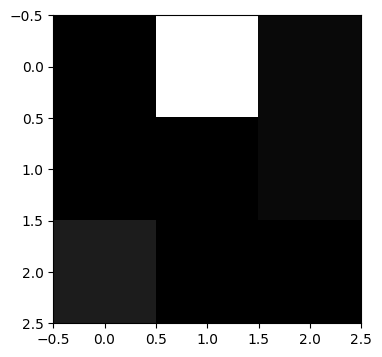

In [56]:
rossi_cnn = CNN(rossi, 'arrest', 'week', 3, 3)
rossi_cnn.plot_image(0)

With more data, this should be much more interesting. We can fit the `CNN` model, but it is unlikely to perform extremely well.


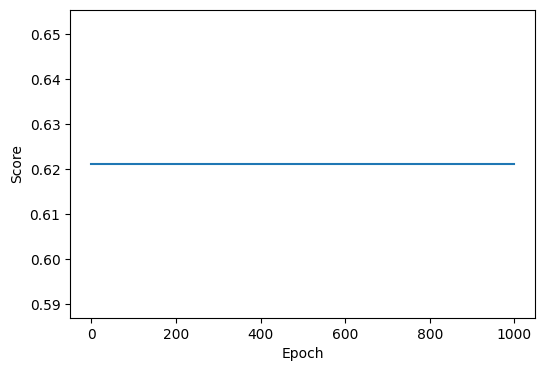

In [57]:
rossi_cnn.train()

Interetingly, it seems this converged to the local optimal solution very quickly. We can also visualise the risks as usual.


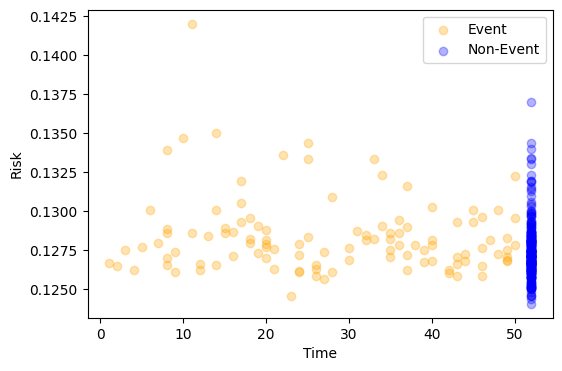

'Score: 0.6211813120309853'

In [58]:
rossi_cnn.score()

Technically the worse model so far but still not that suprisingly bad, especially considering we had to scale the features. Let us also see the weights of this model.


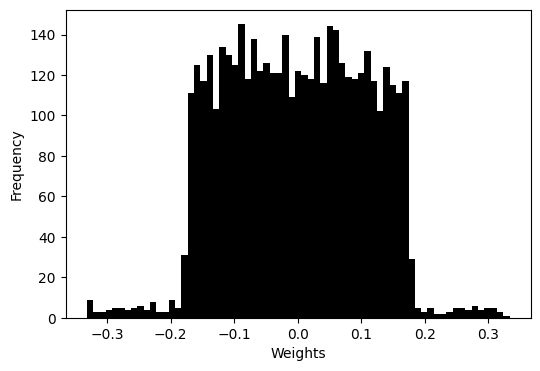

In [59]:
rossi_cnn.return_weights()

## The Chronic Heart Failure Dataset

First we will measure the c-statistic using the `FWL` model with pre-specified weights.

### `FixedWeightLinear` Model


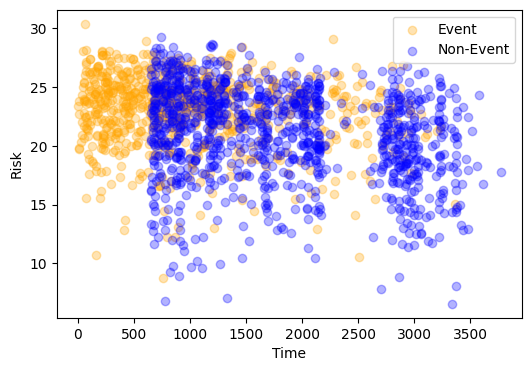

FWL CHF c-statistic: 0.6362972118424834


In [60]:
# Create base NN model
chf_fwl = FixedWeightLinear(chf_c)

# Compute the c-statistic using concordance_statistic
print("FWL CHF c-statistic:", get_concordance_statistic_nn(chf, 'StatusDeath', 'TimeDeath', chf_fwl))

As we are using a new dataset, the graph we plot will be different. It is interesting to see how the risk values are distributed. We can see that the risk values are more spread out than the `Rossi` dataset.

### `VariableWeightLinear` Model

Let us now see the `VWL` model with random weights. It should give the same results as the `FWL` model.


Initial VWL Parameter containing:
tensor([0.3367, 0.1288, 0.2345, 0.2303], requires_grad=True)
Initial VWL c-statistic: 0.6147559643575741
Initial Loss: -5929.1572265625
Final Loss: -4952.9443359375


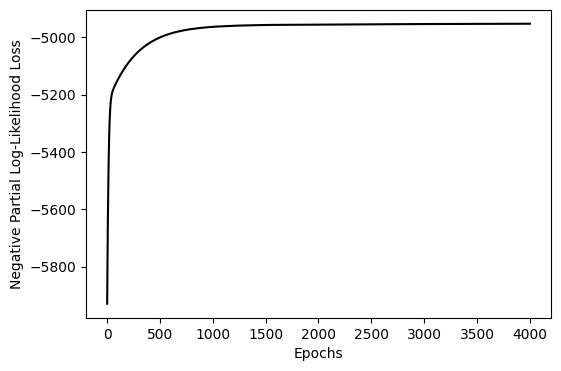

In [61]:
# Apply the VariableWeightLinear model
chf_input_size = chf.shape[1] - 2
chf_vwl = VariableWeightLinear(chf_input_size) # # Number of input features (excluding censor and time variables)

# Initial c-statistic
print("Initial VWL c-statistic:", get_concordance_statistic_nn(chf, 'StatusDeath', 'TimeDeath', chf_vwl, False))

# Train model
# We use the same learning rate as with the bare gradient descent
chf_vwl_loss = train_model(chf, 'StatusDeath', 'TimeDeath', chf_vwl, 0.000001, 4000, True)

Let us see the results.


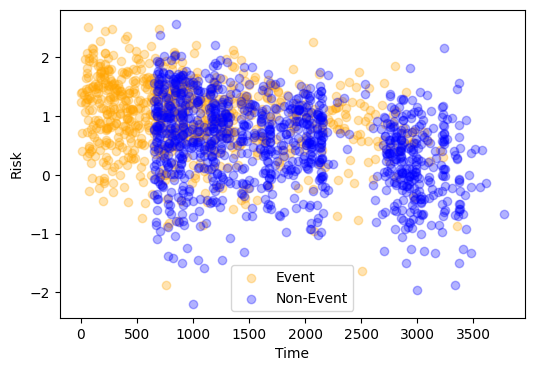

Trained VWL CHF Weights: Parameter containing:
tensor([-0.1931,  0.2343,  0.0428,  0.3543], requires_grad=True)     
Trained VWL CHF Loss: -4952.9453125     
Trained VWL CHF c-statistic 0.6786927277953435


In [62]:
# Final c-statistic
chf_vwl_c = get_concordance_statistic_nn(chf, 'StatusDeath', 'TimeDeath', chf_vwl, True)

# Print the trained weights
print("Trained VWL CHF Weights: {0} \
    \nTrained VWL CHF Loss: {1} \
    \nTrained VWL CHF c-statistic {2}"
    .format(chf_vwl.weights, chf_vwl_loss, chf_vwl_c))        

Slightly different results. Now let's apply the same methods in applying NN models to the `Rossi` dataset upon the `CHF` dataset.

### Simple Neural Network Model (`SNN`)

We expect that the size of the neurons in the hidden layer will not affect the performance of the model much. Let's see if this is true.


In [63]:
# Create a loop to test different architectures (begin with 1 neuron in single hidden layer, increase in steps of 1 until 2 * input_size)
chf_snn_losses = []
chf_snn_scores = []

# This allows us to test different architectures of the NN model
# We do not want to add too many neurons because this can lead to overfitting
chf_snn_hidden_sizes = [1 + i for i in range(chf_input_size * 2)]

# This stores the best model and its score
chf_snn_best = [None, 0, 0]

# Loop through the different architectures
for i in chf_snn_hidden_sizes:
    model = SNN(chf_input_size, i)
    loss, score = test_nn(chf, 'StatusDeath', 'TimeDeath', model, 0.0001, 1000, False)
    if score > chf_snn_best[2]:
        chf_snn_best = [model, loss.detach().numpy(), score]
    chf_snn_losses.append(loss.detach().numpy())
    chf_snn_scores.append(score)

# Print the scores of the best architecture
print("Best SNN CHF: \
    \n- Architecture: SNN[{0}, {1}, 1] \
    \n- Loss: {2} \
    \n- Score: {3}"
    .format(chf_input_size, chf_snn_best[0].hidden_size, chf_snn_best[1], chf_snn_best[2]))

Best SNN CHF:     
- Architecture: SNN[4, 7, 1]     
- Loss: [-4949.955]     
- Score: 0.6793768324231101


Let us visualise the scores of the models.


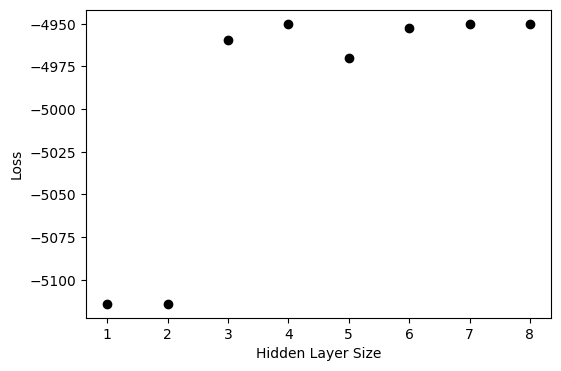

In [64]:
# Plot the losses
plt.figure(figsize=(6, 4))
plt.scatter(chf_snn_hidden_sizes, chf_snn_losses, label='Loss', color='black')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Loss')
plt.show()

And the computed c-statistic scores.


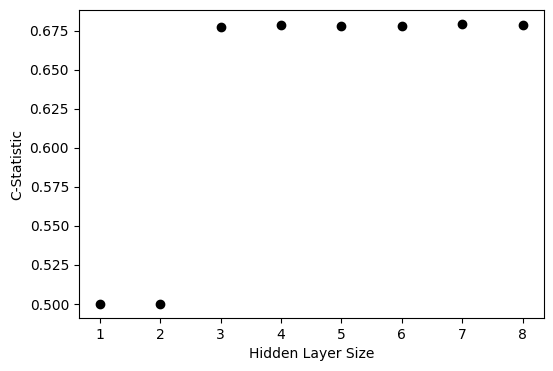

In [65]:
# Plot the c-statistic scores
plt.figure(figsize=(6, 4))
plt.scatter(chf_snn_hidden_sizes, chf_snn_scores, label='C-Statistic', color='black')
plt.xlabel('Hidden Layer Size')
plt.ylabel('C-Statistic')
plt.show()

And the weights of the model.


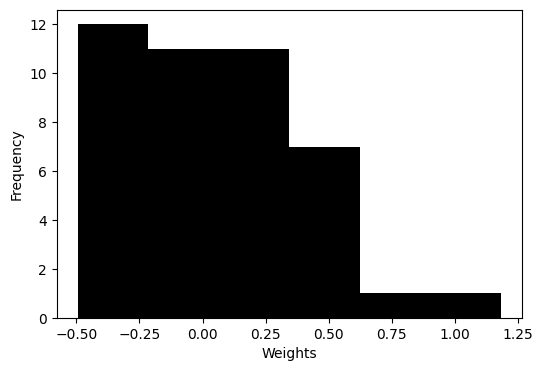

In [66]:
chf_snn_best[0].return_weights()

None of these outperformed standard CPH. Let us investigate further.

### General Neural Network Model (`GNN`)

Now let us `GNN` models, with similar structures. First we will use `1` more neuron in the first hidden layer than the input layer (i.e. `5`), and square root the number of input neurons in the second hidden layer (i.e. `4`).


Initial Loss: -5073.427734375
Final Loss: -5017.08056640625


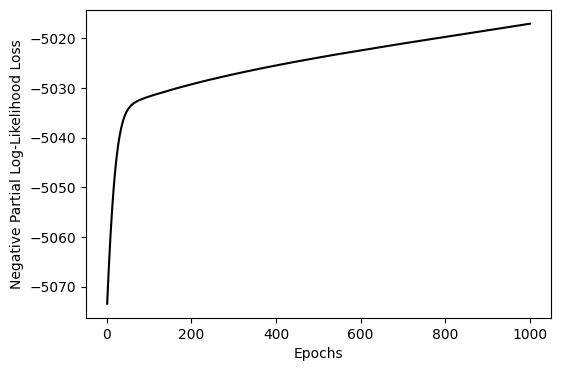

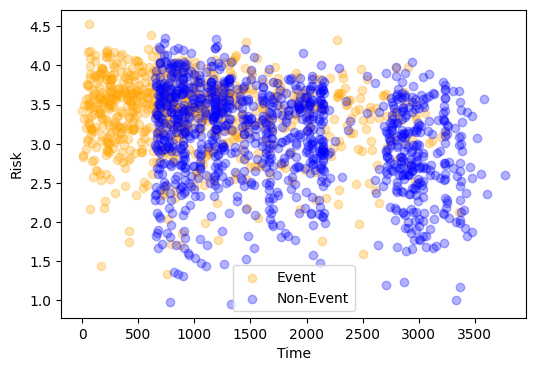

GNN[4, 5, 2, 1] 
- Loss: [-5017.0884]
- Score: 0.6342673181948836


(array([-5017.0884], dtype=float32), 0.6342673181948836)

In [67]:
chf_gnn = GNN([4, 5, 2, 1])
test_nn(chf, 'StatusDeath', 'TimeDeath', chf_gnn, 0.00001, 1000, True)

We see that the model does not perform as well as the `SNN` model. Let us try using double the number of neurons in the first hidden layer than the input layer (i.e. `8`), and square root the number of input neurons in the second hidden layer (i.e. `2`).


Initial Loss: -5117.28955078125
Final Loss: -4980.9267578125


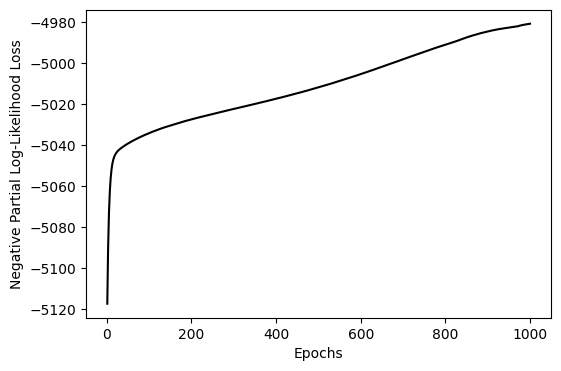

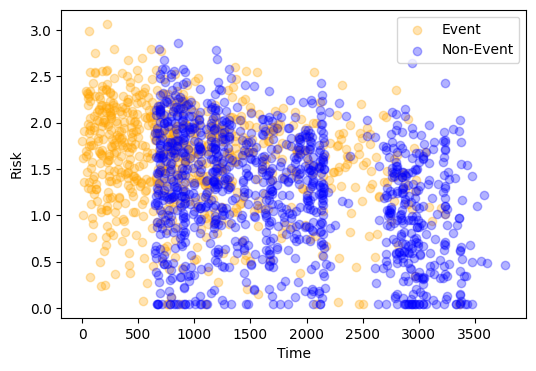

GNN[4, 8, 2, 1] 
- Loss: [-4980.9565]
- Score: 0.6649318769761425


(array([-4980.9565], dtype=float32), 0.6649318769761425)

In [68]:
chf_gnn = GNN([4, 8, 2, 1])
test_nn(chf, 'StatusDeath', 'TimeDeath', chf_gnn, 0.00001, 1000, True)

This was better. Let's try increasing the number of neurons in the second hidden layer.


Initial Loss: -5112.79736328125
Final Loss: -4961.28515625


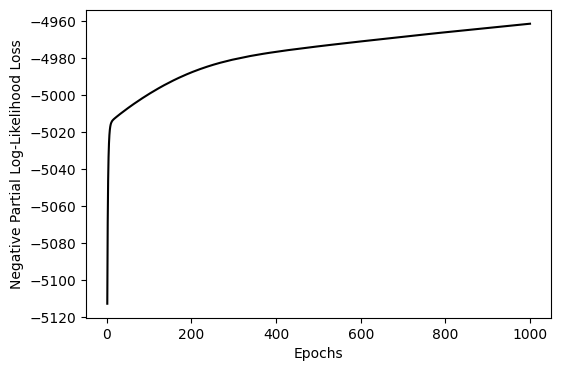

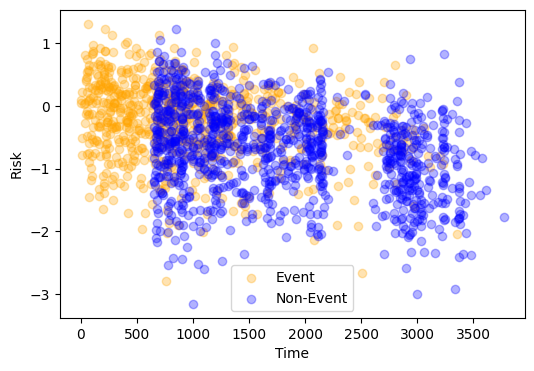

GNN[4, 8, 4, 1] 
- Loss: [-4961.304]
- Score: 0.6752687553894797


(array([-4961.304], dtype=float32), 0.6752687553894797)

In [69]:
chf_architecture = [4, 8, 4, 1]
chf_gnn = GNN(chf_architecture)
test_nn(chf, 'StatusDeath', 'TimeDeath', chf_gnn, 0.00001, 1000, True)

Again a little better. Let's model the weights to make sure we aren't overfitting.


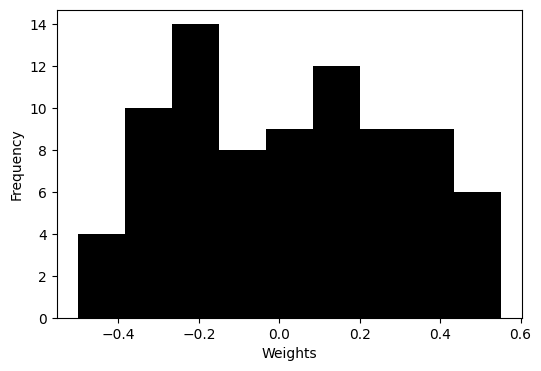

In [70]:
chf_gnn.return_weights()

### Latent Class Analysis (`LCA`)

Now, it is time to use LCA. Let us first establish the baseline.


0    1802
Name: LatentClass, dtype: int64
Loss for latent class 0: [-4954.218]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


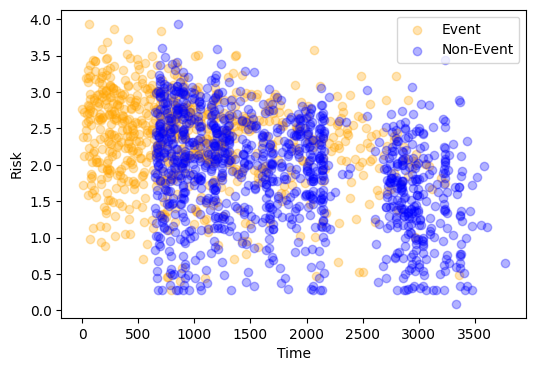

Total Loss: [4954.218] 
Score: 0.6765852256395516


In [71]:
chf_lca = lca(chf, 'StatusDeath', 'TimeDeath', 1)

Now we can split the data into `2` components.


0    1170
1     632
Name: LatentClass, dtype: int64
Loss for latent class 0: [-4954.218]
Loss for latent class 1: [-4949.8657]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


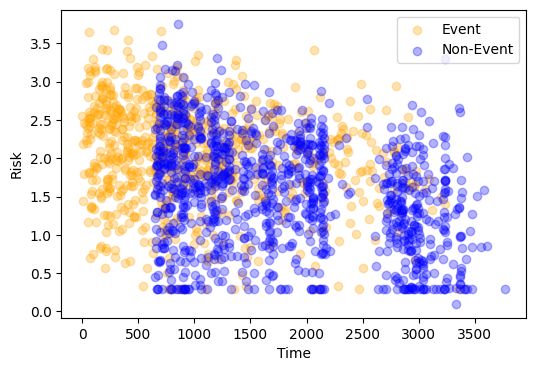

Total Loss: [9904.084] 
Score: 0.6784116125323368


In [72]:
chf_lca2 = lca(chf, 'StatusDeath', 'TimeDeath', 2)

0    1170
1     632
Name: LatentClass, dtype: int64
Loss for latent class 0: [-4966.614]
Loss for latent class 1: [-4950.9146]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


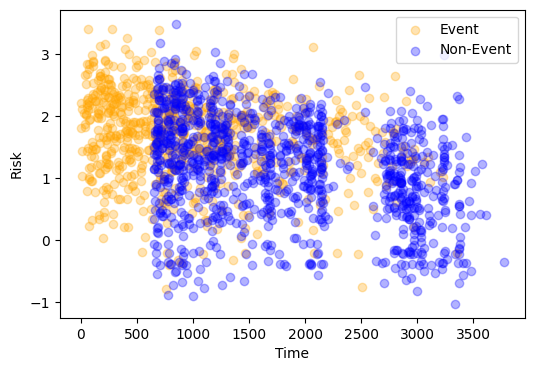

Total Loss: [9917.528] 
Score: 0.6781580914055764


In [73]:
chf_lca2_arch = lca(chf, 'StatusDeath', 'TimeDeath', 2, chf_architecture)

Not as good as with the standard architecture. We can try with `3` classes.


1    1065
0     577
2     160
Name: LatentClass, dtype: int64
Loss for latent class 0: [-4954.218]
Loss for latent class 1: [-4949.8657]
Loss for latent class 2: [-4949.525]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


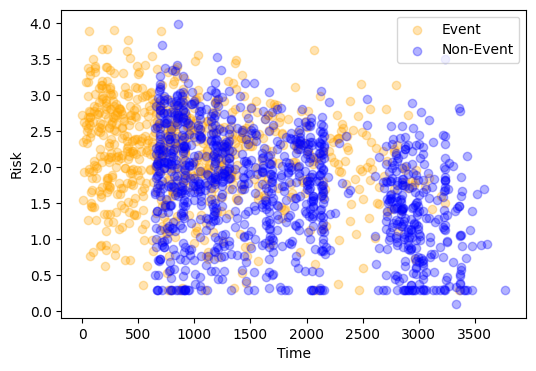

Total Loss: [14853.609] 
Score: 0.6785191146881288


In [74]:
chf_lca3 = lca(chf, 'StatusDeath', 'TimeDeath', 3)

1    1065
0     577
2     160
Name: LatentClass, dtype: int64
Loss for latent class 0: [-4966.614]
Loss for latent class 1: [-4950.9146]
Loss for latent class 2: [-4949.4585]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


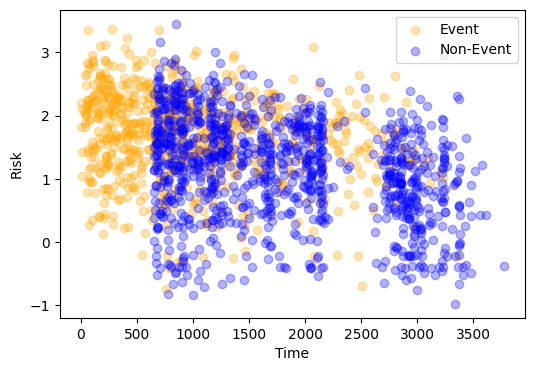

Total Loss: [14866.986] 
Score: 0.6782868640413912


In [75]:
chf_lca3_arch = lca(chf, 'StatusDeath', 'TimeDeath', 3, chf_architecture)

And finally using `4` classes.


2    737
3    624
1    295
0    146
Name: LatentClass, dtype: int64
Loss for latent class 0: [-4954.218]
Loss for latent class 1: [-4949.8657]
Loss for latent class 2: [-4949.525]
Loss for latent class 3: [-4949.414]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


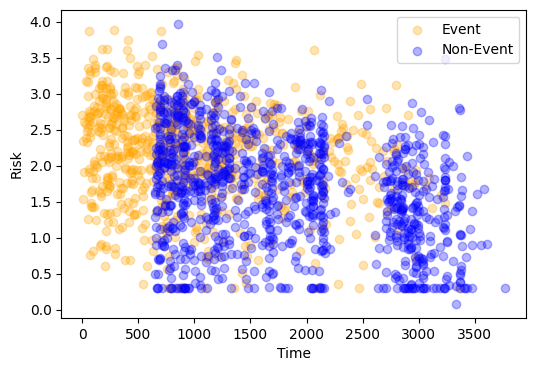

Total Loss: [19803.023] 
Score: 0.6785990227076746


In [76]:
chf_lca4 = lca(chf, 'StatusDeath', 'TimeDeath', 4)

2    737
3    624
1    295
0    146
Name: LatentClass, dtype: int64
Loss for latent class 0: [-4966.614]
Loss for latent class 1: [-4950.9146]
Loss for latent class 2: [-4949.4585]
Loss for latent class 3: [-4949.126]


C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  risks = np.array(risks)[sorted_indices]
C:\Users\omarc\AppData\Local\Temp\ipykernel_22944\3273223497.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  risks = np.array(risks)[sorted_indices]


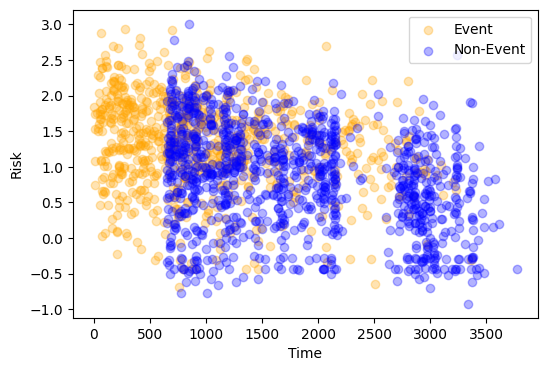

Total Loss: [19816.113] 
Score: 0.6790198332854268


In [77]:
chf_lca4_arch = lca(chf, 'StatusDeath', 'TimeDeath', 4, chf_architecture)

We will not use `5` classes as we have not outperformed results from the standard CPH model, let alone those scored by `Mbotwa et al. (2021)`. Let us try using a CNN model.

### Convolutional Neural Network (`CNN`)

As mentioned, we must first scale the data.


In [78]:
chf_scaled = chf.copy()

# Normalise the data from 0 to 1
scaler = StandardScaler()

# Get the columns that need to be scaled
columns_to_scale = [col for col in chf_scaled.columns if col not in ['StatusDeath', 'TimeDeath']]

# Fit the scaler to the data and transform the selected columns
chf_scaled[columns_to_scale] = scaler.fit_transform(chf_scaled[columns_to_scale])

Now, we can fit the model.


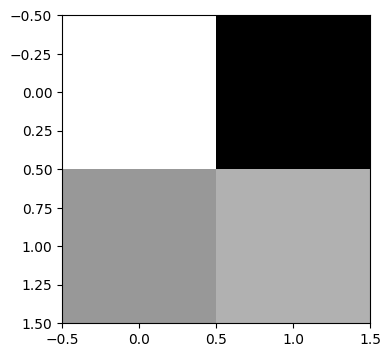

In [79]:
chf_cnn = CNN(chf_scaled, 'StatusDeath', 'TimeDeath', 2, 2)
chf_cnn.plot_image(0)

Due to the size of the image, we doubt it will be able to capture the relationships between the covariates. Let us see the results.


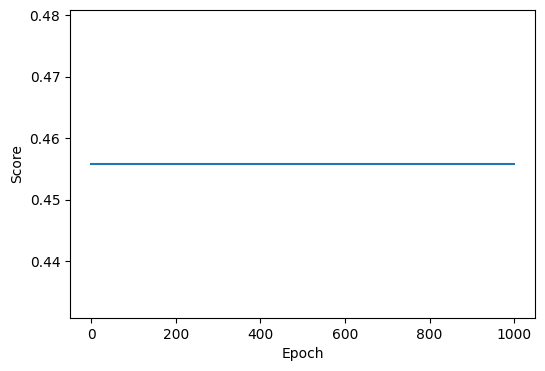

In [80]:
chf_cnn.train()

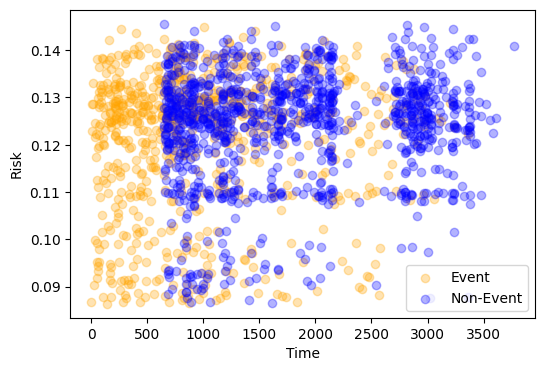

'Score: 0.45582696177062376'

In [81]:
chf_cnn.score()

As expected.


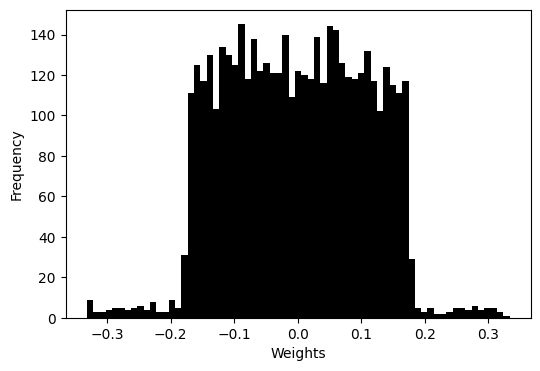

In [82]:
chf_cnn.return_weights()

We have not beaten the results scored by `Mbotwa et al. (2021)`. Thus, we will not actively attempt to produce results on the entire dataset.


## Visualising the data

We can also visualise the data.


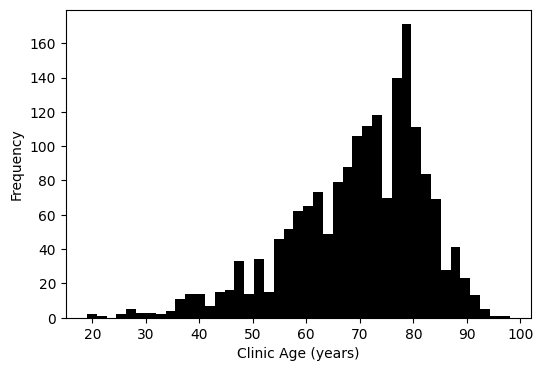

In [83]:
# Calculates number of bins for the histograms by taking the square root of the number of data points (comes out as 50)
n_bins = int(np.ceil(np.sqrt(chf.shape[0])))

# Plot histogram for ClinicAge
# Set figure size
plt.figure(figsize=(6, 4))
plt.hist(chf['ClinicAge'], bins=n_bins, color="black")
plt.xlabel('Clinic Age (years)')
plt.ylabel('Frequency')
plt.show()

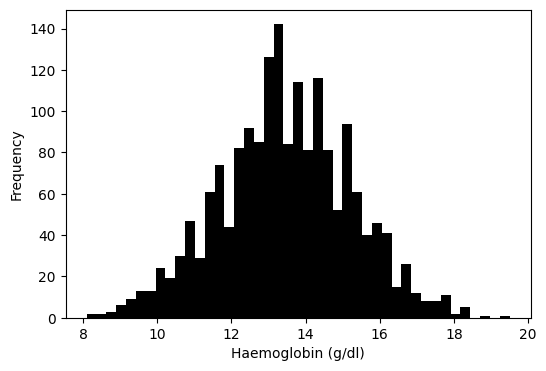

In [84]:
# Plot histogram for ClinicAge
plt.figure(figsize=(6, 4))
plt.hist(chf['Haemoglobin'], bins=n_bins, color="black")
plt.xlabel('Haemoglobin (g/dl)')
plt.ylabel('Frequency')
plt.show()

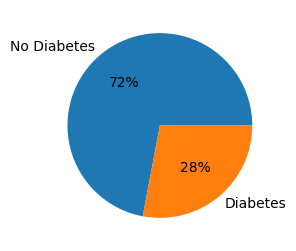

In [85]:
# Create pie chart for each categorical feature of interest
diabetes = chf['Diabetes'].copy()
# Replace 0 with 'No Diabetes' and 1 with 'Diabetes'
diabetes.replace({0: 'No Diabetes', 1: 'Diabetes'}, inplace=True)
diabetes.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(3, 3))
plt.ylabel('')
plt.show()

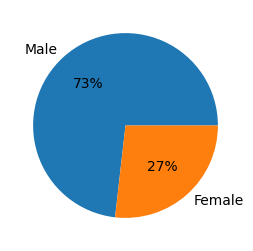

In [86]:
# Create pie chart for each categorical feature of interest
sex = chf['MaleSex=Male'].copy()
# Replace 0 with 'Female' and 1 with 'Male'
sex.replace({0: 'Female', 1: 'Male'}, inplace=True)
sex.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(3, 3))
plt.ylabel('')
plt.show()

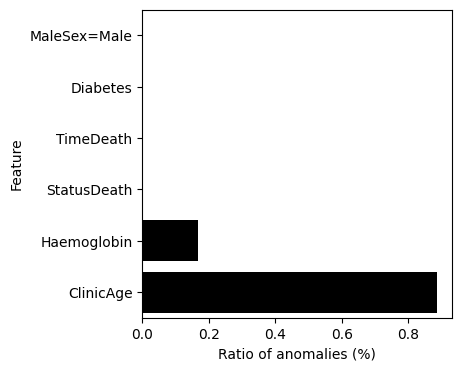

In [87]:
# Calculate standard deviation of each feature
std = chf.std()
outlier_upper_threshold = chf.mean() + 3 * std
outlier_lower_threshold = chf.mean() - 3 * std
# Calculate and plot the ratio of number of outliers to number of data in each feature
outlier_ratio = ((chf > outlier_upper_threshold).sum() + (chf < outlier_lower_threshold).sum())/chf.shape[0] * 100
# Sort x axis by outlier ratio
outlier_ratio.sort_values(ascending=False, inplace=True)
outlier_ratio.plot(kind='barh', figsize=(4, 4))
# Horizontal black bars
plt.barh(outlier_ratio.index, outlier_ratio, color='black')
plt.xlabel('Ratio of anomalies (%)')
plt.ylabel('Feature')
plt.show()

In [88]:
# Compute direct correlations of selected features with the target variable
correlations_original = chf.corrwith(chf['StatusDeath'])
# Sort them according the strength of correlations.
correlations_index = correlations_original.abs().sort_values(kind="quicksort", ascending=False).index
# Use index to sort correlations
correlations = correlations_original[correlations_index]
# Display correlation value from original dataframe
correlations_df = pd.DataFrame(correlations, index=correlations.index, columns=['Correlation'])
# Print correlations
display(correlations_df)

,Correlation
StatusDeath,1.000000
TimeDeath,-0.426450
ClinicAge,0.256941
Haemoglobin,-0.202872
MaleSex=Male,0.095669
Diabetes,0.090201


Note: you may need to restart the kernel to use updated packages.


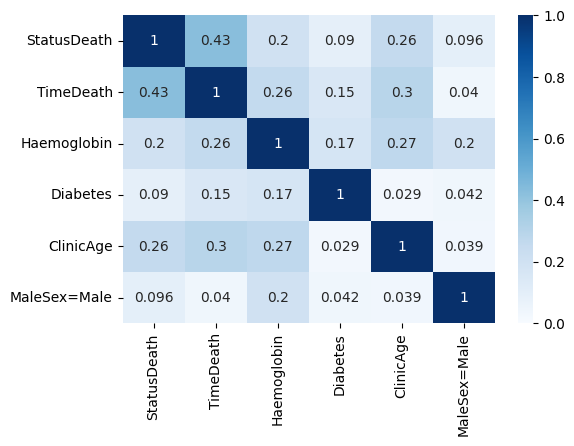

In [89]:
%pip install seaborn

import seaborn as sns

# Create heatmap of all correlations
correlation=chf.corr().abs()
heatmap = sns.heatmap(correlation, vmin=0, vmax=1, annot=True, cmap='Blues')
plt.show()